<a href="https://colab.research.google.com/github/Kishorecsmani/ScalerProject/blob/main/LogisticsCaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color='33A2FF'><b>Problem Statement

<font color='33A2FF'>The company wants to understand and process the data coming out of data engineering pipelines:

<font color='33A2FF'> 1) Clean, sanitize and manipulate data to get useful features out of raw fields

<font color='33A2FF'> 2) Make sense out of the raw data and help the data science team to build forecasting models on it

<font color='33A2FF'> 3) Finding linear relationship between agregated features by using hypothesis testing

<font color='33A2FF'> 4) Check from where most orders are coming from (State, Corridor etc)

<font color='33A2FF'> 5) Busiest corridor, avg distance between them, avg time taken


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import t

#https://drive.google.com/file/d/19azWuc0nJVXSA_Wuwac1U8dMU9YUORWU/view?usp=sharing

In [ ]:
!gdown 19azWuc0nJVXSA_Wuwac1U8dMU9YUORWU

In [ ]:
df = pd.read_csv("data.csv")
df.head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


<font color='33A2FF'><b>1.Identification of variables and data types:</b></font>

In [ ]:
#Analyze the structure of the data.
#rows ans columns of data
df.shape

(144867, 24)

In [ ]:
#checking datatypes
df.dtypes

data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
is_cutoff                            bool
cutoff_factor                       int64
cutoff_timestamp                   object
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
factor                            float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
segment_factor                    

In [ ]:
# Number of records with No Null value
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  


<font color='33A2FF'><b>2.Analysing the basic metrics :</b></font>

In [ ]:
# describe on column having integer data type
df.describe(include='all')

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867,144867,144867,144867,144867,144867,144574,144867,144606,144867,...,144867,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
unique,2,14817,1504,2,14817,1508,1498,1481,1468,26369,...,93180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,training,2018-09-28 05:23:15.359220,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-21 18:37:09.322207,...,2018-09-24 05:19:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,104858,101,1812,99660,101,23347,23347,15192,15192,81,...,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000


In [ ]:
df.describe(include=[np.number])

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


In [ ]:
#checking null values in every column of our data
df.isnull().sum()/len(df)*100

data                              0.000000
trip_creation_time                0.000000
route_schedule_uuid               0.000000
route_type                        0.000000
trip_uuid                         0.000000
source_center                     0.000000
source_name                       0.202254
destination_center                0.000000
destination_name                  0.180165
od_start_time                     0.000000
od_end_time                       0.000000
start_scan_to_end_scan            0.000000
is_cutoff                         0.000000
cutoff_factor                     0.000000
cutoff_timestamp                  0.000000
actual_distance_to_destination    0.000000
actual_time                       0.000000
osrm_time                         0.000000
osrm_distance                     0.000000
factor                            0.000000
segment_actual_time               0.000000
segment_osrm_time                 0.000000
segment_osrm_distance             0.000000
segment_fac

<font color='#0dab7f'> source_name  and destination_name column has missing/null values</font>

In [ ]:
#number of unique values in our data
for i in df.columns:
  print(i, " : ", df[i].nunique())

data  :  2
trip_creation_time  :  14817
route_schedule_uuid  :  1504
route_type  :  2
trip_uuid  :  14817
source_center  :  1508
source_name  :  1498
destination_center  :  1481
destination_name  :  1468
od_start_time  :  26369
od_end_time  :  26369
start_scan_to_end_scan  :  1915
is_cutoff  :  2
cutoff_factor  :  501
cutoff_timestamp  :  93180
actual_distance_to_destination  :  144515
actual_time  :  3182
osrm_time  :  1531
osrm_distance  :  138046
factor  :  45641
segment_actual_time  :  747
segment_osrm_time  :  214
segment_osrm_distance  :  113799
segment_factor  :  5675


<font color='#0dab7f'><b>Categorical columns :</b> data, route_type, is_cutoff </font>

<font color='#0dab7f'><b>Non Categorical columns : </b>

<font color='#0dab7f'>trip_creation_time,

<font color='#0dab7f'>route_schedule_uuid,

<font color='#0dab7f'>trip_uuid,

<font color='#0dab7f'>source_center,

<font color='#0dab7f'>source_name,

<font color='#0dab7f'>destination_center,

<font color='#0dab7f'>destination_name,

<font color='#0dab7f'>od_start_time,

<font color='#0dab7f'>od_end_time,

<font color='#0dab7f'>start_scan_to_end_scan,

<font color='#0dab7f'>cutoff_factor, 

<font color='#0dab7f'>cutoff_timestamp,

<font color='#0dab7f'>actual_distance_to_destination,

<font color='#0dab7f'>actual_time,

<font color='#0dab7f'>osrm_time,

<font color='#0dab7f'>osrm_distance,

<font color='#0dab7f'>factor,

<font color='#0dab7f'>segment_actual_time,

<font color='#0dab7f'>segment_osrm_time,

<font color='#0dab7f'>segment_osrm_distance,

<font color='#0dab7f'>segment_factor 

</font>

<font color='33A2FF'><b>3.Basic data cleaning and exploration :</b></font>

In [ ]:
df.loc[df['source_name'].isnull()]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
112,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,...,2018-09-26 14:09:19,22.783440,48.0,34.0,37.7749,1.411765,48.0,34.0,37.7749,1.411765
113,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,...,2018-09-26 13:19:23,46.071250,98.0,41.0,56.3575,2.390244,49.0,33.0,34.1661,1.484848
114,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,...,2018-09-26 12:49:33,67.714993,127.0,58.0,80.4811,2.189655,29.0,17.0,24.1236,1.705882
115,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,...,2018-09-26 12:21:18,88.149642,156.0,73.0,101.2556,2.136986,28.0,14.0,20.7746,2.000000
116,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,...,2018-09-26 11:25:24,112.691981,212.0,92.0,127.9860,2.304348,55.0,18.0,26.7304,3.055556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144484,test,2018-10-03 09:06:06.690094,thanos::sroute:cbef3b6a-79ea-4d5e-a215-b558a70...,FTL,trip-153855756668984584,IND282002AAD,NaN,IND474003AAA,Gwalior_HrihrNgr_I (Madhya Pradesh),2018-10-03 17:34:21.835475,...,2018-10-03 20:54:08,45.134384,62.0,45.0,47.7734,1.377778,34.0,23.0,23.6601,1.478261
144485,test,2018-10-03 09:06:06.690094,thanos::sroute:cbef3b6a-79ea-4d5e-a215-b558a70...,FTL,trip-153855756668984584,IND282002AAD,NaN,IND474003AAA,Gwalior_HrihrNgr_I (Madhya Pradesh),2018-10-03 17:34:21.835475,...,2018-10-03 20:30:09,66.542266,86.0,71.0,71.9549,1.211268,23.0,25.0,24.1815,0.920000
144486,test,2018-10-03 09:06:06.690094,thanos::sroute:cbef3b6a-79ea-4d5e-a215-b558a70...,FTL,trip-153855756668984584,IND282002AAD,NaN,IND474003AAA,Gwalior_HrihrNgr_I (Madhya Pradesh),2018-10-03 17:34:21.835475,...,2018-10-03 20:00:08,88.143957,116.0,114.0,112.6943,1.017544,30.0,43.0,40.7394,0.697674
144487,test,2018-10-03 09:06:06.690094,thanos::sroute:cbef3b6a-79ea-4d5e-a215-b558a70...,FTL,trip-153855756668984584,IND282002AAD,NaN,IND474003AAA,Gwalior_HrihrNgr_I (Madhya Pradesh),2018-10-03 17:34:21.835475,...,2018-10-03 19:02:11,111.084417,173.0,123.0,134.1940,1.406504,57.0,45.0,46.9217,1.266667


<font color='#0dab7f'><b>Missing values Treatment :</b> 

<font color='#0dab7f'>1) If source value is NAN then replace source NAN values with destination name

<font color='#0dab7f'>2) If Destination value is NAN then replace the destination NAN values with Source name

<font color='#0dab7f'>3) If both source and destination values have NAN then replace it with "Unknown"  

In [ ]:
# 1) If source value is NAN then replace source NAN values with destination name

# 2) If Destination value is NAN then replace the destination NAN values with Source name

df['destination_name'].fillna(df['source_name'], inplace = True)
df['source_name'].fillna(df['destination_name'], inplace = True)

In [ ]:
# 3) If both source and destination values have NAN then replace it with "Unknown"
df.loc[df['destination_name'].isnull()]['trip_uuid']

68006    trip-153800051661903546
68007    trip-153800051661903546
68008    trip-153800051661903546
Name: trip_uuid, dtype: object

In [ ]:
df.loc[df['trip_uuid'] == 'trip-153800051661903546', ['destination_name', 'source_name']] = df.loc[df['trip_uuid'] == 'trip-153800051661903546', ['destination_name', 'source_name']].fillna('unknown')

In [ ]:
df.loc[df['trip_uuid'] == 'trip-153800051661903546', ['destination_name', 'source_name']]

,destination_name,source_name
68006,unknown,unknown
68007,unknown,unknown
68008,unknown,unknown


In [ ]:
#checking null values in every column of our data after handling missing values
df.isnull().sum()/len(df)*100

data                              0.0
trip_creation_time                0.0
route_schedule_uuid               0.0
route_type                        0.0
trip_uuid                         0.0
source_center                     0.0
source_name                       0.0
destination_center                0.0
destination_name                  0.0
od_start_time                     0.0
od_end_time                       0.0
start_scan_to_end_scan            0.0
is_cutoff                         0.0
cutoff_factor                     0.0
cutoff_timestamp                  0.0
actual_distance_to_destination    0.0
actual_time                       0.0
osrm_time                         0.0
osrm_distance                     0.0
factor                            0.0
segment_actual_time               0.0
segment_osrm_time                 0.0
segment_osrm_distance             0.0
segment_factor                    0.0
dtype: float64

<font color='#0dab7f'><b>Merging of rows and aggregation of fields:</b> 

<font color='#0dab7f'>group by used for Trip_uuid, Source ID and Destination ID

In [ ]:
df1 = df.groupby(['trip_uuid', 'source_center', 'destination_center'])[['source_name','destination_name','data','route_type','is_cutoff','trip_creation_time','route_schedule_uuid',\
'actual_distance_to_destination','actual_time','osrm_time', 'osrm_distance', 'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance', 'od_start_time', 'od_end_time',\
 'start_scan_to_end_scan','cutoff_factor', 'factor', 'segment_factor','cutoff_timestamp']]\
.aggregate({'source_name':"first",'destination_name':"first",'data':"first", 'route_type':"first",'is_cutoff':'last','trip_creation_time':'first','route_schedule_uuid':'first',\
            'actual_distance_to_destination':"last",'actual_time':'last','osrm_time':'last', 'osrm_distance':'last', 'segment_actual_time':'sum', \
            'segment_osrm_time':'sum', 'segment_osrm_distance':'sum', 'od_start_time':'last', 'od_end_time':'last', 'start_scan_to_end_scan':'last',\
            'cutoff_factor':'sum', 'factor':'max', 'segment_factor':'max', 'cutoff_timestamp':'max'}).reset_index()

df1.head(5)

,trip_uuid,source_center,destination_center,source_name,destination_name,data,route_type,is_cutoff,trip_creation_time,route_schedule_uuid,...,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_start_time,od_end_time,start_scan_to_end_scan,cutoff_factor,factor,segment_factor,cutoff_timestamp
0,trip-153671041653548748,IND209304AAA,IND000000ACB,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),training,FTL,False,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,...,728.0,534.0,670.6205,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,3749,2.275304,10.066667,2018-09-13 12:40:43
1,trip-153671041653548748,IND462022AAA,IND209304AAA,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),training,FTL,False,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,...,820.0,474.0,649.8528,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,5060,2.862745,7.333333,2018-09-12 14:56:29
2,trip-153671042288605164,IND561203AAB,IND562101AAA,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),training,Carting,False,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,...,46.0,26.0,28.1995,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,51,1.807692,2.142857,2018-09-12 02:41:24
3,trip-153671042288605164,IND572101AAA,IND561203AAB,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),training,Carting,False,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,...,95.0,39.0,55.9899,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,183,2.285714,6.666667,2018-09-12 01:39:28
4,trip-153671043369099517,IND000000ACB,IND160002AAC,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),training,FTL,False,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,...,608.0,231.0,317.7408,2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,1689,2.882075,9.821429,2018-09-14 16:54:36


In [ ]:
df1['od_start_time'] = df1['od_start_time'].apply(lambda x: pd.Timestamp(x).strftime('%Y-%b-%d %H:%M:%S'))
df1['trip_creation_time'] = df1['trip_creation_time'].apply(lambda x: pd.Timestamp(x).strftime('%Y-%b-%d %H:%M:%S'))
df1['od_end_time'] = df1['od_end_time'].apply(lambda x: pd.Timestamp(x).strftime('%Y-%b-%d %H:%M:%S'))
df1['cutoff_timestamp'] = df1['cutoff_timestamp'].apply(lambda x: pd.Timestamp(x).strftime('%Y-%b-%d %H:%M:%S'))

df1.head(5)

,trip_uuid,source_center,destination_center,source_name,destination_name,data,route_type,is_cutoff,trip_creation_time,route_schedule_uuid,...,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_start_time,od_end_time,start_scan_to_end_scan,cutoff_factor,factor,segment_factor,cutoff_timestamp
0,trip-153671041653548748,IND209304AAA,IND000000ACB,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),training,FTL,False,2018-Sep-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,...,728.0,534.0,670.6205,2018-Sep-12 16:39:46,2018-Sep-13 13:40:23,1260.0,3749,2.275304,10.066667,2018-Sep-13 12:40:43
1,trip-153671041653548748,IND462022AAA,IND209304AAA,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),training,FTL,False,2018-Sep-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,...,820.0,474.0,649.8528,2018-Sep-12 00:00:16,2018-Sep-12 16:39:46,999.0,5060,2.862745,7.333333,2018-Sep-12 14:56:29
2,trip-153671042288605164,IND561203AAB,IND562101AAA,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),training,Carting,False,2018-Sep-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,...,46.0,26.0,28.1995,2018-Sep-12 02:03:09,2018-Sep-12 03:01:59,58.0,51,1.807692,2.142857,2018-Sep-12 02:41:24
3,trip-153671042288605164,IND572101AAA,IND561203AAB,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),training,Carting,False,2018-Sep-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,...,95.0,39.0,55.9899,2018-Sep-12 00:00:22,2018-Sep-12 02:03:09,122.0,183,2.285714,6.666667,2018-Sep-12 01:39:28
4,trip-153671043369099517,IND000000ACB,IND160002AAC,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),training,FTL,False,2018-Sep-12 00:00:33,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,...,608.0,231.0,317.7408,2018-Sep-14 03:40:17,2018-Sep-14 17:34:55,834.0,1689,2.882075,9.821429,2018-Sep-14 16:54:36


In [ ]:
df1['od_start_time'] = pd.to_datetime(df1['od_start_time'], dayfirst=True, errors='coerce')
df1['od_end_time'] = pd.to_datetime(df1['od_end_time'], dayfirst=True, errors='coerce')
df1['trip_creation_time'] = pd.to_datetime(df1['trip_creation_time'], dayfirst=True, errors='coerce')
df1['cutoff_timestamp'] = pd.to_datetime(df1['cutoff_timestamp'], dayfirst=True, errors='coerce')
df1.dtypes

trip_uuid                                 object
source_center                             object
destination_center                        object
source_name                               object
destination_name                          object
data                                      object
route_type                                object
is_cutoff                                   bool
trip_creation_time                datetime64[ns]
route_schedule_uuid                       object
actual_distance_to_destination           float64
actual_time                              float64
osrm_time                                float64
osrm_distance                            float64
segment_actual_time                      float64
segment_osrm_time                        float64
segment_osrm_distance                    float64
od_start_time                     datetime64[ns]
od_end_time                       datetime64[ns]
start_scan_to_end_scan                   float64
cutoff_factor       

In [ ]:
df1.head(5)

,trip_uuid,source_center,destination_center,source_name,destination_name,data,route_type,is_cutoff,trip_creation_time,route_schedule_uuid,...,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_start_time,od_end_time,start_scan_to_end_scan,cutoff_factor,factor,segment_factor,cutoff_timestamp
0,trip-153671041653548748,IND209304AAA,IND000000ACB,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),training,FTL,False,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,...,728.0,534.0,670.6205,2018-09-12 16:39:46,2018-09-13 13:40:23,1260.0,3749,2.275304,10.066667,2018-09-13 12:40:43
1,trip-153671041653548748,IND462022AAA,IND209304AAA,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),training,FTL,False,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,...,820.0,474.0,649.8528,2018-09-12 00:00:16,2018-09-12 16:39:46,999.0,5060,2.862745,7.333333,2018-09-12 14:56:29
2,trip-153671042288605164,IND561203AAB,IND562101AAA,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),training,Carting,False,2018-09-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,...,46.0,26.0,28.1995,2018-09-12 02:03:09,2018-09-12 03:01:59,58.0,51,1.807692,2.142857,2018-09-12 02:41:24
3,trip-153671042288605164,IND572101AAA,IND561203AAB,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),training,Carting,False,2018-09-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,...,95.0,39.0,55.9899,2018-09-12 00:00:22,2018-09-12 02:03:09,122.0,183,2.285714,6.666667,2018-09-12 01:39:28
4,trip-153671043369099517,IND000000ACB,IND160002AAC,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),training,FTL,False,2018-09-12 00:00:33,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,...,608.0,231.0,317.7408,2018-09-14 03:40:17,2018-09-14 17:34:55,834.0,1689,2.882075,9.821429,2018-09-14 16:54:36


<font color='#0dab7f'><b>Feature Creation</b>

<font color='#0dab7f'> Derived a new column od_time_diff_mins which is time difference between od_start_time and od_end_time

In [ ]:
df1['od_time_diff_mins'] =  (df1['od_end_time'] - df1['od_start_time']).astype('timedelta64[m]')
df1.head(5)

,trip_uuid,source_center,destination_center,source_name,destination_name,data,route_type,is_cutoff,trip_creation_time,route_schedule_uuid,...,segment_osrm_time,segment_osrm_distance,od_start_time,od_end_time,start_scan_to_end_scan,cutoff_factor,factor,segment_factor,cutoff_timestamp,od_time_diff_mins
0,trip-153671041653548748,IND209304AAA,IND000000ACB,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),training,FTL,False,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,...,534.0,670.6205,2018-09-12 16:39:46,2018-09-13 13:40:23,1260.0,3749,2.275304,10.066667,2018-09-13 12:40:43,1260.0
1,trip-153671041653548748,IND462022AAA,IND209304AAA,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),training,FTL,False,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,...,474.0,649.8528,2018-09-12 00:00:16,2018-09-12 16:39:46,999.0,5060,2.862745,7.333333,2018-09-12 14:56:29,999.0
2,trip-153671042288605164,IND561203AAB,IND562101AAA,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),training,Carting,False,2018-09-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,...,26.0,28.1995,2018-09-12 02:03:09,2018-09-12 03:01:59,58.0,51,1.807692,2.142857,2018-09-12 02:41:24,58.0
3,trip-153671042288605164,IND572101AAA,IND561203AAB,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),training,Carting,False,2018-09-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,...,39.0,55.9899,2018-09-12 00:00:22,2018-09-12 02:03:09,122.0,183,2.285714,6.666667,2018-09-12 01:39:28,122.0
4,trip-153671043369099517,IND000000ACB,IND160002AAC,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),training,FTL,False,2018-09-12 00:00:33,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,...,231.0,317.7408,2018-09-14 03:40:17,2018-09-14 17:34:55,834.0,1689,2.882075,9.821429,2018-09-14 16:54:36,834.0


<font color='#0dab7f'> Dropped the original column 'od_start_time' and 'od_end_time' because we have calculated new column 'od_time_diff_mins'

In [ ]:
df1 = df1.drop(['od_start_time' , 'od_end_time'], axis=1)
df1

,trip_uuid,source_center,destination_center,source_name,destination_name,data,route_type,is_cutoff,trip_creation_time,route_schedule_uuid,...,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,start_scan_to_end_scan,cutoff_factor,factor,segment_factor,cutoff_timestamp,od_time_diff_mins
0,trip-153671041653548748,IND209304AAA,IND000000ACB,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),training,FTL,False,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,...,446.5496,728.0,534.0,670.6205,1260.0,3749,2.275304,10.066667,2018-09-13 12:40:43,1260.0
1,trip-153671041653548748,IND462022AAA,IND209304AAA,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),training,FTL,False,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,...,544.8027,820.0,474.0,649.8528,999.0,5060,2.862745,7.333333,2018-09-12 14:56:29,999.0
2,trip-153671042288605164,IND561203AAB,IND562101AAA,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),training,Carting,False,2018-09-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,...,28.1994,46.0,26.0,28.1995,58.0,51,1.807692,2.142857,2018-09-12 02:41:24,58.0
3,trip-153671042288605164,IND572101AAA,IND561203AAB,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),training,Carting,False,2018-09-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,...,56.9116,95.0,39.0,55.9899,122.0,183,2.285714,6.666667,2018-09-12 01:39:28,122.0
4,trip-153671043369099517,IND000000ACB,IND160002AAC,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),training,FTL,False,2018-09-12 00:00:33,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,...,281.2109,608.0,231.0,317.7408,834.0,1689,2.882075,9.821429,2018-09-14 16:54:36,834.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,trip-153861115439069069,IND628204AAA,IND627657AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),test,Carting,False,2018-10-03 23:59:14,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,...,42.5213,49.0,42.0,42.1431,62.0,87,1.243902,1.384615,2018-10-04 03:17:33,62.0
26364,trip-153861115439069069,IND628613AAA,IND627005AAA,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),test,Carting,False,2018-10-03 23:59:14,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,...,40.6080,89.0,77.0,78.5869,91.0,87,1.875000,1.363636,2018-10-04 05:32:33,91.0
26365,trip-153861115439069069,IND628801AAA,IND628204AAA,Eral_Busstand_D (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),test,Carting,False,2018-10-03 23:59:14,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,...,16.0185,29.0,14.0,16.0184,44.0,21,2.625000,2.625000,2018-10-04 02:05:30,44.0
26366,trip-153861118270144424,IND583119AAA,IND583101AAA,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),test,FTL,False,2018-10-03 23:59:42,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,...,52.5303,233.0,42.0,52.5303,287.0,62,5.547619,7.520000,2018-10-04 07:29:32,287.0


<font color='#0dab7f'><b>Feature Creation</b>

 <font color='#0dab7f'> Destination Name: Split and extract features out of destination. City-place-code (State)

<font color='#0dab7f'> Source Name: Split and extract features out of destination. City-place-code (State)

In [ ]:
df1[['source_city', 'source_place', 'source_code_state']] = df1['source_name'].str.split(r'[\_\s\(]', 2, expand=True)
df1[['destination_city', 'destination_place', 'destination_code_state']] = df1['destination_name'].str.split(r'[\_\s\(]', 2, expand=True)

#r'\s+(?=\b(?:dark|\d+)\b)'

In [ ]:
df1[['source_code', 'source_state']] = df1['source_code_state'].str.split(r'[\(]', 2, expand=True)
df1[['destination_code', 'destination_state']] = df1['destination_code_state'].str.split(r'[\(]', 2, expand=True)

In [ ]:
df1['source_state'] = df1['source_state'].str[:-1]
df1['destination_state'] = df1['destination_state'].str[:-1]
df1['source_code'] = df1['source_code'].str[:-1]
df1['destination_code'] = df1['destination_code'].str[:-1]

In [ ]:
df1.head(5)

,trip_uuid,source_center,destination_center,source_name,destination_name,data,route_type,is_cutoff,trip_creation_time,route_schedule_uuid,...,source_city,source_place,source_code_state,destination_city,destination_place,destination_code_state,source_code,source_state,destination_code,destination_state
0,trip-153671041653548748,IND209304AAA,IND000000ACB,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),training,FTL,False,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,...,Kanpur,Central,H_6 (Uttar Pradesh),Gurgaon,Bilaspur,HB (Haryana),H_6,Uttar Pradesh,HB,Haryana
1,trip-153671041653548748,IND462022AAA,IND209304AAA,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),training,FTL,False,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,...,Bhopal,Trnsport,H (Madhya Pradesh),Kanpur,Central,H_6 (Uttar Pradesh),H,Madhya Pradesh,H_6,Uttar Pradesh
2,trip-153671042288605164,IND561203AAB,IND562101AAA,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),training,Carting,False,2018-09-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,...,Doddablpur,ChikaDPP,D (Karnataka),Chikblapur,ShntiSgr,D (Karnataka),D,Karnataka,D,Karnataka
3,trip-153671042288605164,IND572101AAA,IND561203AAB,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),training,Carting,False,2018-09-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,...,Tumkur,Veersagr,I (Karnataka),Doddablpur,ChikaDPP,D (Karnataka),I,Karnataka,D,Karnataka
4,trip-153671043369099517,IND000000ACB,IND160002AAC,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),training,FTL,False,2018-09-12 00:00:33,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,...,Gurgaon,Bilaspur,HB (Haryana),Chandigarh,Mehmdpur,H (Punjab),HB,Haryana,H,Punjab


<font color='#0dab7f'><b>Feature Creation</b>

<font color='#0dab7f'> Trip_creation_time: Extract features like month, year and day etc

In [ ]:
df1['trip_creation_year'] = df1['trip_creation_time'].dt.year
df1['trip_creation_month'] = df1['trip_creation_time'].dt.month
df1['trip_creation_day'] = df1['trip_creation_time'].dt.day
df1.head(5)

,trip_uuid,source_center,destination_center,source_name,destination_name,data,route_type,is_cutoff,trip_creation_time,route_schedule_uuid,...,destination_city,destination_place,destination_code_state,source_code,source_state,destination_code,destination_state,trip_creation_year,trip_creation_month,trip_creation_day
0,trip-153671041653548748,IND209304AAA,IND000000ACB,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),training,FTL,False,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,...,Gurgaon,Bilaspur,HB (Haryana),H_6,Uttar Pradesh,HB,Haryana,2018,9,12
1,trip-153671041653548748,IND462022AAA,IND209304AAA,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),training,FTL,False,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,...,Kanpur,Central,H_6 (Uttar Pradesh),H,Madhya Pradesh,H_6,Uttar Pradesh,2018,9,12
2,trip-153671042288605164,IND561203AAB,IND562101AAA,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),training,Carting,False,2018-09-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,...,Chikblapur,ShntiSgr,D (Karnataka),D,Karnataka,D,Karnataka,2018,9,12
3,trip-153671042288605164,IND572101AAA,IND561203AAB,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),training,Carting,False,2018-09-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,...,Doddablpur,ChikaDPP,D (Karnataka),I,Karnataka,D,Karnataka,2018,9,12
4,trip-153671043369099517,IND000000ACB,IND160002AAC,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),training,FTL,False,2018-09-12 00:00:33,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,...,Chandigarh,Mehmdpur,H (Punjab),HB,Haryana,H,Punjab,2018,9,12


<font color='#0dab7f'> Dropped the original column and intermediate column from dataframe 'destination_code_state', 'source_code_state', 'destination_name', 'source_name' because we have derived new columns 

In [ ]:
df1 = df1.drop(['destination_code_state', 'source_code_state', 'destination_name', 'source_name'], axis = 1)
df1.head(5)

,trip_uuid,source_center,destination_center,data,route_type,is_cutoff,trip_creation_time,route_schedule_uuid,actual_distance_to_destination,actual_time,...,source_place,destination_city,destination_place,source_code,source_state,destination_code,destination_state,trip_creation_year,trip_creation_month,trip_creation_day
0,trip-153671041653548748,IND209304AAA,IND000000ACB,training,FTL,False,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,383.759164,732.0,...,Central,Gurgaon,Bilaspur,H_6,Uttar Pradesh,HB,Haryana,2018,9,12
1,trip-153671041653548748,IND462022AAA,IND209304AAA,training,FTL,False,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,440.973689,830.0,...,Trnsport,Kanpur,Central,H,Madhya Pradesh,H_6,Uttar Pradesh,2018,9,12
2,trip-153671042288605164,IND561203AAB,IND562101AAA,training,Carting,False,2018-09-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,24.644021,47.0,...,ChikaDPP,Chikblapur,ShntiSgr,D,Karnataka,D,Karnataka,2018,9,12
3,trip-153671042288605164,IND572101AAA,IND561203AAB,training,Carting,False,2018-09-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,48.542890,96.0,...,Veersagr,Doddablpur,ChikaDPP,I,Karnataka,D,Karnataka,2018,9,12
4,trip-153671043369099517,IND000000ACB,IND160002AAC,training,FTL,False,2018-09-12 00:00:33,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,237.439610,611.0,...,Bilaspur,Chandigarh,Mehmdpur,HB,Haryana,H,Punjab,2018,9,12


In [ ]:
#checking null values in every column of our data
df1.isnull().sum()/len(df)*100

trip_uuid                         0.000000
source_center                     0.000000
destination_center                0.000000
data                              0.000000
route_type                        0.000000
is_cutoff                         0.000000
trip_creation_time                0.000000
route_schedule_uuid               0.000000
actual_distance_to_destination    0.000000
actual_time                       0.000000
osrm_time                         0.000000
osrm_distance                     0.000000
segment_actual_time               0.000000
segment_osrm_time                 0.000000
segment_osrm_distance             0.000000
start_scan_to_end_scan            0.000000
cutoff_factor                     0.000000
factor                            0.000000
segment_factor                    0.000000
cutoff_timestamp                  0.000000
od_time_diff_mins                 0.000000
source_city                       0.000000
source_place                      0.000690
destination

<font color='#0dab7f'><b>Missing values Treatments:</b> 

<font color='#0dab7f'>Handling Missing values again as there are NAN values  source place, source code, source state, destination place , destination code, destination state:

<font color='#0dab7f'>1) As city is not having any null values so replacing state , place, code with City for both destination and source values

In [ ]:
df1['destination_place'].fillna(df1['destination_city'], inplace = True)
df1['destination_state'].fillna(df1['destination_city'], inplace = True)
df1['destination_code'].fillna(df1['destination_city'], inplace = True)

df1['source_place'].fillna(df1['source_city'], inplace = True)
df1['source_state'].fillna(df1['source_city'], inplace = True)
df1['source_code'].fillna(df1['source_city'], inplace = True)

In [ ]:
#checking null values in every column of our data after handling missing values
df1.isnull().sum()

trip_uuid                         0
source_center                     0
destination_center                0
data                              0
route_type                        0
is_cutoff                         0
trip_creation_time                0
route_schedule_uuid               0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
start_scan_to_end_scan            0
cutoff_factor                     0
factor                            0
segment_factor                    0
cutoff_timestamp                  0
od_time_diff_mins                 0
source_city                       0
source_place                      0
destination_city                  0
destination_place                 0
source_code                       0
source_state                      0
destination_code            

In [ ]:
df1.shape

(26368, 32)

<font color='#0dab7f'><b>Merging of rows and aggregation of fields:</b> 

<font color='#0dab7f'>group by using Trip_uuid

In [ ]:
df1.head(5)

,trip_uuid,source_center,destination_center,data,route_type,is_cutoff,trip_creation_time,route_schedule_uuid,actual_distance_to_destination,actual_time,...,source_place,destination_city,destination_place,source_code,source_state,destination_code,destination_state,trip_creation_year,trip_creation_month,trip_creation_day
0,trip-153671041653548748,IND209304AAA,IND000000ACB,training,FTL,False,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,383.759164,732.0,...,Central,Gurgaon,Bilaspur,H_6,Uttar Pradesh,HB,Haryana,2018,9,12
1,trip-153671041653548748,IND462022AAA,IND209304AAA,training,FTL,False,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,440.973689,830.0,...,Trnsport,Kanpur,Central,H,Madhya Pradesh,H_6,Uttar Pradesh,2018,9,12
2,trip-153671042288605164,IND561203AAB,IND562101AAA,training,Carting,False,2018-09-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,24.644021,47.0,...,ChikaDPP,Chikblapur,ShntiSgr,D,Karnataka,D,Karnataka,2018,9,12
3,trip-153671042288605164,IND572101AAA,IND561203AAB,training,Carting,False,2018-09-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,48.542890,96.0,...,Veersagr,Doddablpur,ChikaDPP,I,Karnataka,D,Karnataka,2018,9,12
4,trip-153671043369099517,IND000000ACB,IND160002AAC,training,FTL,False,2018-09-12 00:00:33,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,237.439610,611.0,...,Bilaspur,Chandigarh,Mehmdpur,HB,Haryana,H,Punjab,2018,9,12


In [ ]:
df2 = df1.groupby(['trip_uuid'])[['source_center', 'destination_center', 'data', 'route_type', 'is_cutoff', 'trip_creation_time', 'route_schedule_uuid', 'actual_distance_to_destination',\
                            'actual_time','osrm_time', 'osrm_distance','segment_actual_time','segment_osrm_time', 'segment_osrm_distance', 'start_scan_to_end_scan', 'cutoff_factor',\
                            'factor', 'segment_factor', 'cutoff_timestamp', 'od_time_diff_mins', 'source_city', 'source_place', 'destination_city', 'destination_place', 'source_code',\
                            'source_state', 'destination_code', 'destination_state', 'trip_creation_year', 'trip_creation_month', 'trip_creation_day']]\
.aggregate({'source_center':'first', 'destination_center':'first', 'data':'first', 'route_type':'first', 'is_cutoff':'first', 'trip_creation_time':'first',\
            'route_schedule_uuid':'first', 'actual_distance_to_destination':'sum','actual_time':'sum','osrm_time':'sum', 'osrm_distance':'sum','segment_actual_time':'sum',\
            'segment_osrm_time':'sum', 'segment_osrm_distance':'sum', 'start_scan_to_end_scan':'sum', 'cutoff_factor':'first','factor':'first', 'segment_factor':'first',\
            'cutoff_timestamp':'first', 'od_time_diff_mins':'sum', 'source_city':'first', 'source_place':'first', 'destination_city':'first', 'destination_place':'first',\
            'source_code':'first', 'source_state':'first', 'destination_code':'first', 'destination_state':'first', 'trip_creation_year':'first',\
            'trip_creation_month':'first', 'trip_creation_day':'first'}).reset_index()
df2.head(5)

,trip_uuid,source_center,destination_center,data,route_type,is_cutoff,trip_creation_time,route_schedule_uuid,actual_distance_to_destination,actual_time,...,source_place,destination_city,destination_place,source_code,source_state,destination_code,destination_state,trip_creation_year,trip_creation_month,trip_creation_day
0,trip-153671041653548748,IND209304AAA,IND000000ACB,training,FTL,False,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,824.732854,1562.0,...,Central,Gurgaon,Bilaspur,H_6,Uttar Pradesh,HB,Haryana,2018,9,12
1,trip-153671042288605164,IND561203AAB,IND562101AAA,training,Carting,False,2018-09-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,73.186911,143.0,...,ChikaDPP,Chikblapur,ShntiSgr,D,Karnataka,D,Karnataka,2018,9,12
2,trip-153671043369099517,IND000000ACB,IND160002AAC,training,FTL,False,2018-09-12 00:00:33,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,1927.404273,3347.0,...,Bilaspur,Chandigarh,Mehmdpur,HB,Haryana,H,Punjab,2018,9,12
3,trip-153671046011330457,IND400072AAB,IND401104AAA,training,Carting,False,2018-09-12 00:01:00,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,17.175274,59.0,...,Hub,Mumbai,MiraRd,,Maharashtra,IP,Maharashtra,2018,9,12
4,trip-153671052974046625,IND583101AAA,IND583201AAA,training,FTL,False,2018-09-12 00:02:09,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,127.448500,341.0,...,Dc,Hospet,,,Karnataka,Karnataka,Hospet,2018,9,12


In [ ]:
#dropping the columns which is not required for analysis:
#data
#is_cutoff
#route_schedule_uuid
#cutoff_factor
#factor
#segment_factor
#cutoff_timestamp

drop_columns = ['data','is_cutoff','route_schedule_uuid','cutoff_factor','factor','segment_factor','cutoff_timestamp']
df2 = df2.drop(drop_columns, axis = 1)
df2.head(5)

,trip_uuid,source_center,destination_center,route_type,trip_creation_time,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,...,source_place,destination_city,destination_place,source_code,source_state,destination_code,destination_state,trip_creation_year,trip_creation_month,trip_creation_day
0,trip-153671041653548748,IND209304AAA,IND000000ACB,FTL,2018-09-12 00:00:16,824.732854,1562.0,717.0,991.3523,1548.0,...,Central,Gurgaon,Bilaspur,H_6,Uttar Pradesh,HB,Haryana,2018,9,12
1,trip-153671042288605164,IND561203AAB,IND562101AAA,Carting,2018-09-12 00:00:22,73.186911,143.0,68.0,85.1110,141.0,...,ChikaDPP,Chikblapur,ShntiSgr,D,Karnataka,D,Karnataka,2018,9,12
2,trip-153671043369099517,IND000000ACB,IND160002AAC,FTL,2018-09-12 00:00:33,1927.404273,3347.0,1740.0,2354.0665,3308.0,...,Bilaspur,Chandigarh,Mehmdpur,HB,Haryana,H,Punjab,2018,9,12
3,trip-153671046011330457,IND400072AAB,IND401104AAA,Carting,2018-09-12 00:01:00,17.175274,59.0,15.0,19.6800,59.0,...,Hub,Mumbai,MiraRd,,Maharashtra,IP,Maharashtra,2018,9,12
4,trip-153671052974046625,IND583101AAA,IND583201AAA,FTL,2018-09-12 00:02:09,127.448500,341.0,117.0,146.7918,340.0,...,Dc,Hospet,,,Karnataka,Karnataka,Hospet,2018,9,12


In [ ]:
df2.isnull().sum()

trip_uuid                         0
source_center                     0
destination_center                0
route_type                        0
trip_creation_time                0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
start_scan_to_end_scan            0
od_time_diff_mins                 0
source_city                       0
source_place                      0
destination_city                  0
destination_place                 0
source_code                       0
source_state                      0
destination_code                  0
destination_state                 0
trip_creation_year                0
trip_creation_month               0
trip_creation_day                 0
dtype: int64

##<font color='33A2FF'><b> **UNIVARIATE ANALYSIS**

In [ ]:
#Function for Univariate plot for numerical
def univariateNumerical(df, col):
  print("Describe Method")
  print(df[col].describe())
  print('\n\n')
  print("Value count Method")
  print(df[col].value_counts().head(10))
  plt.figure(figsize=(25,5))
  plt.subplot(1,2,1)
  plt.title("HIST PLOT")
  sns.histplot(data = df, x= col, kde=True, color = 'orange' )
  #plt.subplot(1,3,2)
  #plt.title("COUNT PLOT")
  #sns.countplot(data = df, x= col)
  plt.subplot(1,2,2)
  plt.title("BOX PLOT")
  sns.boxplot(x = col, data = df, color = 'green')
  plt.show()

In [ ]:
#Function for Univariate plot for Discrete
def univariateDiscrete(df, col):
  print("Describe Method")
  print(df[col].describe())
  print('\n\n')
  print("Value count Method")
  print(df[col].value_counts().head(10))
  plt.figure()  
  plt.title("COUNT PLOT")
  sns.countplot(data = df, x= col)
  plt.xticks(rotation = 90)
  plt.show()

Describe Method
count    14817.000000
mean       164.477838
std        305.388147
min          9.002461
25%         22.837239
50%         48.474072
75%        164.583208
max       2186.531787
Name: actual_distance_to_destination, dtype: float64



Value count Method
195.620460    2
27.959967     2
26.581610     2
23.034042     2
15.807111     2
18.036366     2
195.557906    2
25.142773     2
23.851755     2
25.878761     2
Name: actual_distance_to_destination, dtype: int64


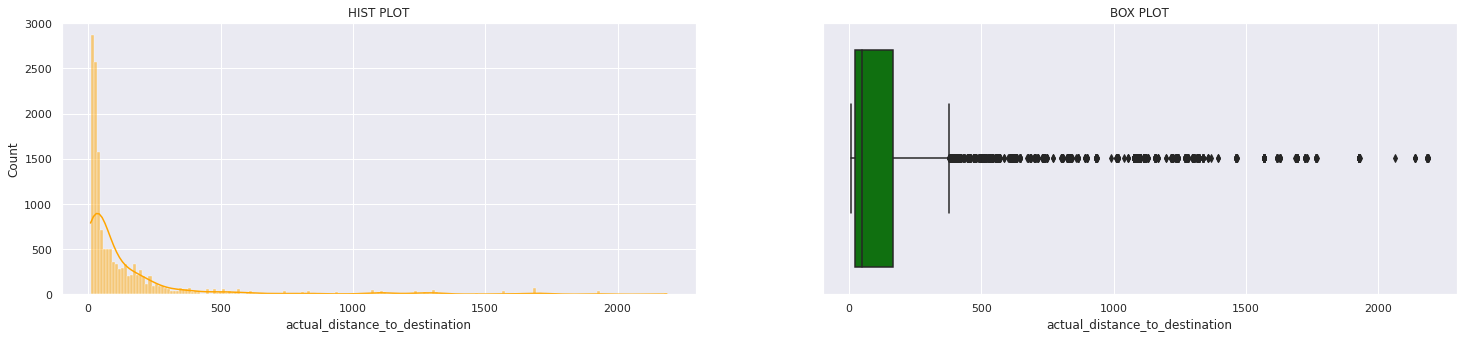

In [ ]:
#actual_distance_to_destination
univariateNumerical(df2, 'actual_distance_to_destination')

<font color='#0dab7f'><b>Observation</b>: Around 50% of the trips has distance more than 50 kms. Maximum distance travelled is 2186 kms </font>

<font color='#0dab7f'><b>Recommendation</b>: Company can increase their business by giving offers / discounts to long distance trips </font>

Describe Method
count    14817.000000
mean       357.143754
std        561.396157
min          9.000000
25%         67.000000
50%        149.000000
75%        370.000000
max       6265.000000
Name: actual_time, dtype: float64



Value count Method
60.0    134
50.0    130
42.0    122
48.0    114
38.0    111
54.0    107
72.0    103
58.0    101
66.0     99
62.0     94
Name: actual_time, dtype: int64


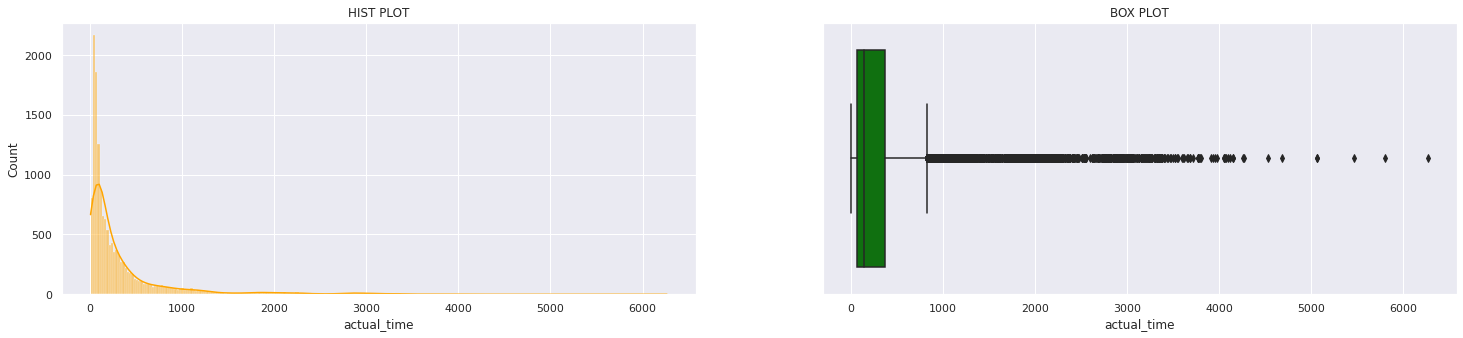

In [ ]:
#actual_time
univariateNumerical(df2, 'actual_time')

<font color='#0dab7f'><b>Observation</b>: 50% of delivery has the actual time of 149 mins and maximum time taken for longest delivery is 6265 mins </font>

<font color='#0dab7f'><b>Recommendation</b>: Company can increase their business by giving offers / discounts to trips which takes more time</font>

Describe Method
count    14817.000000
mean       161.384018
std        271.360995
min          6.000000
25%         29.000000
50%         60.000000
75%        168.000000
max       2032.000000
Name: osrm_time, dtype: float64



Value count Method
34.0    268
20.0    263
29.0    261
23.0    240
32.0    237
22.0    233
17.0    223
33.0    214
16.0    206
21.0    203
Name: osrm_time, dtype: int64


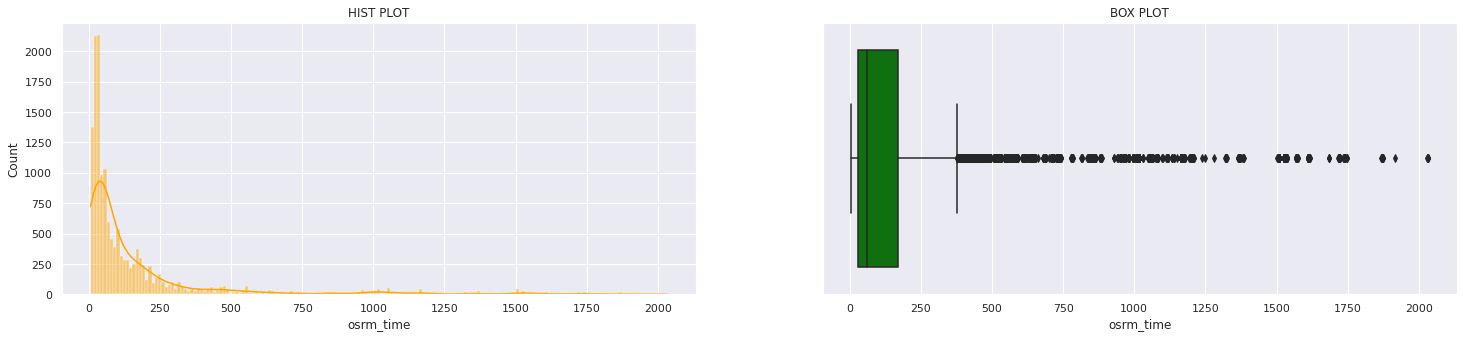

In [ ]:
#osrm_time
univariateNumerical(df2, 'osrm_time')

<font color='#0dab7f'><b>Observation</b>: 50% of delivery time calculated in OSRM engine is 60 mins and maximum time taken for longest delivery is 2032 mins </font>

Describe Method
count    14817.000000
mean       204.344689
std        370.395573
min          9.072900
25%         30.819200
50%         65.618800
75%        208.475000
max       2840.081000
Name: osrm_distance, dtype: float64



Value count Method
36.5748     2
18.6534     2
35.6580     2
53.3295     2
36.0975     2
18.8871     2
36.3874     2
169.8487    2
15.2706     2
16.3460     2
Name: osrm_distance, dtype: int64


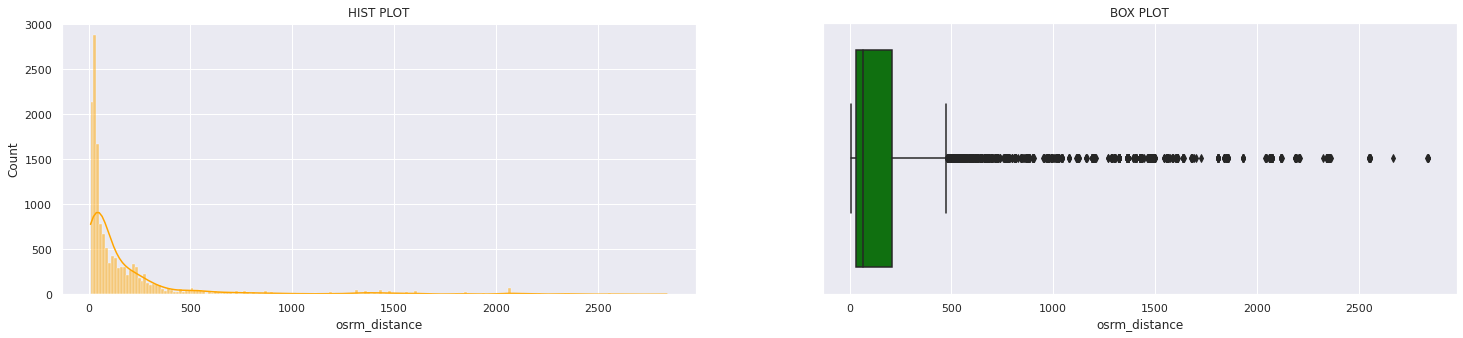

In [ ]:
#osrm_distance
univariateNumerical(df2, 'osrm_distance')

<font color='#0dab7f'><b>Observation</b>: 50% of delivery in OSRM engine is 65 kms and maximum time taken for longest delivery is 2840 kms </font>

Describe Method
count    14817.000000
mean       353.892286
std        556.247965
min          9.000000
25%         66.000000
50%        147.000000
75%        367.000000
max       6230.000000
Name: segment_actual_time, dtype: float64



Value count Method
47.0    121
41.0    113
60.0    107
35.0    100
55.0    100
49.0     98
53.0     98
39.0     98
45.0     94
74.0     94
Name: segment_actual_time, dtype: int64


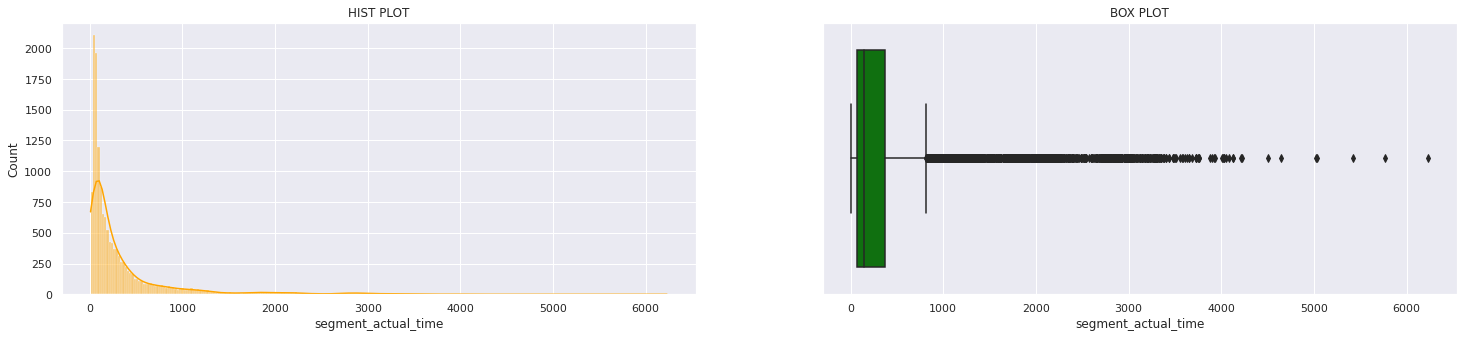

In [ ]:
#segment_actual_time
univariateNumerical(df2, 'segment_actual_time')

<font color='#0dab7f'><b>Observation</b>: 50% of delivery has the segment actual time 147 mins and maximum time taken for longest delivery is 6230 mins </font>

Describe Method
count    14817.000000
mean       180.949787
std        314.542047
min          6.000000
25%         31.000000
50%         65.000000
75%        185.000000
max       2564.000000
Name: segment_osrm_time, dtype: float64



Value count Method
17.0    221
20.0    213
19.0    211
18.0    209
22.0    208
23.0    203
21.0    188
28.0    184
35.0    180
27.0    179
Name: segment_osrm_time, dtype: int64


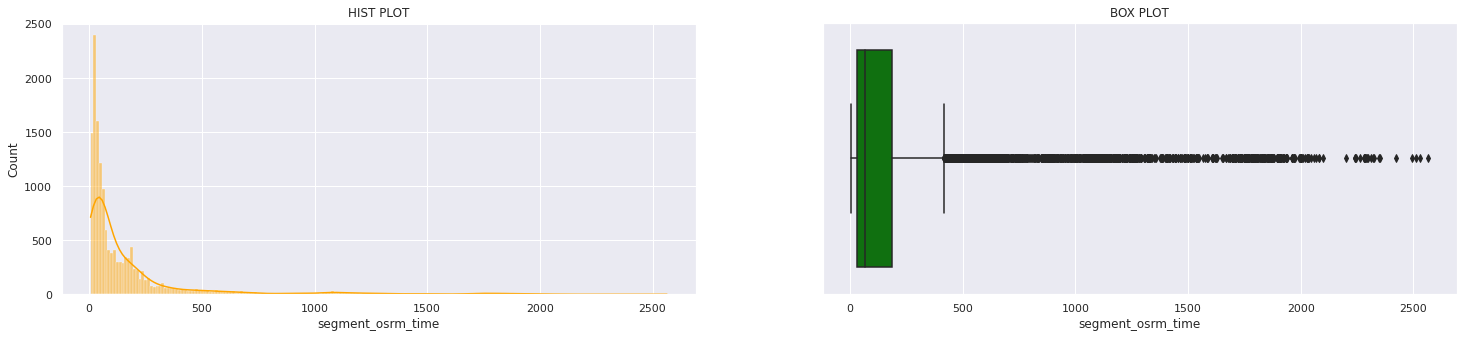

In [ ]:
#segment_osrm_time
univariateNumerical(df2, 'segment_osrm_time')

<font color='#0dab7f'><b>Observation</b>: 50% of delivery has the segment OSRM time of 65 mins and maximum time taken for longest delivery is 2564 mins </font>

Describe Method
count    14817.000000
mean       223.201161
std        416.628374
min          9.072900
25%         32.654500
50%         70.154400
75%        218.802400
max       3523.632400
Name: segment_osrm_distance, dtype: float64



Value count Method
40.7823    2
17.5079    2
21.3528    2
49.0124    2
53.1450    2
40.8774    2
39.1677    2
13.0535    2
49.3262    2
40.9697    2
Name: segment_osrm_distance, dtype: int64


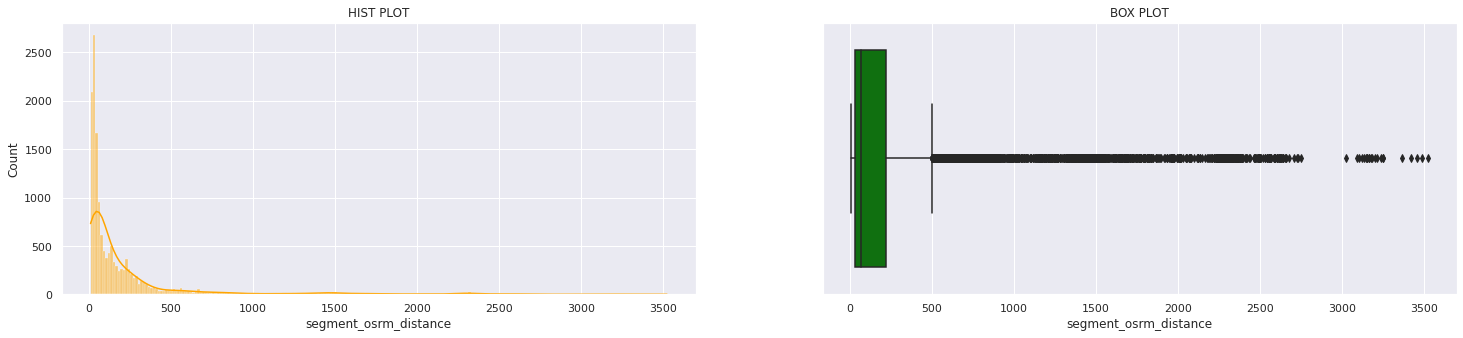

In [ ]:
#segment_osrm_distance
univariateNumerical(df2, 'segment_osrm_distance')

<font color='#0dab7f'><b>Observation</b>: 50% of delivery has the segment OSRM distance of 70 kms and maximum distance taken for longest delivery is 3523 kms </font>

Describe Method
count    14817.000000
mean       530.793885
std        658.655245
min         23.000000
25%        149.000000
50%        280.000000
75%        637.000000
max       7898.000000
Name: od_time_diff_mins, dtype: float64



Value count Method
148.0    52
115.0    51
128.0    50
113.0    49
87.0     48
99.0     48
105.0    48
150.0    48
135.0    47
170.0    47
Name: od_time_diff_mins, dtype: int64


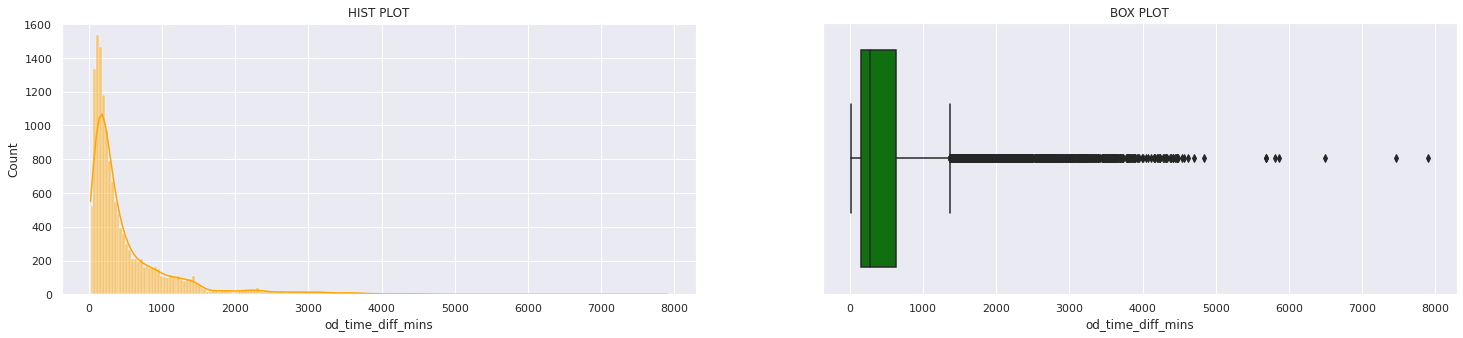

In [ ]:
#od_time_diff_mins 
univariateNumerical(df2, 'od_time_diff_mins')

<font color='#0dab7f'><b>Observation</b>: 50% of trip time difference between the start and end 280 mins and max trip time is 7898 mins </font>

Describe Method
count       14817
unique          2
top       Carting
freq         8908
Name: route_type, dtype: object



Value count Method
Carting    8908
FTL        5909
Name: route_type, dtype: int64


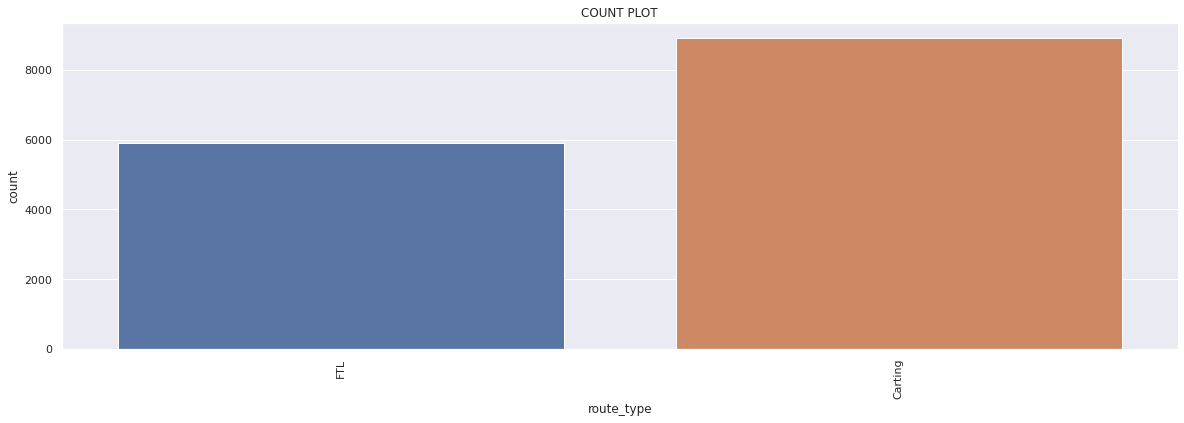

In [ ]:
# route_type
univariateDiscrete(df2, 'route_type')

<font color='#0dab7f'><b>Observation</b>:Most of the route type is Carting and it is around 8908</font>

<font color='#0dab7f'><b>Recommendation</b>: Company can increase their business by giving offers / discounts to route type FTL </font>

Describe Method
count           14817
unique             54
top       Maharashtra
freq             2714
Name: source_state, dtype: object



Value count Method
Maharashtra      2714
Karnataka        2127
Haryana          1790
Tamil Nadu        989
Telangana         781
Uttar Pradesh     763
Gujarat           742
Delhi             727
West Bengal       665
Punjab            526
Name: source_state, dtype: int64


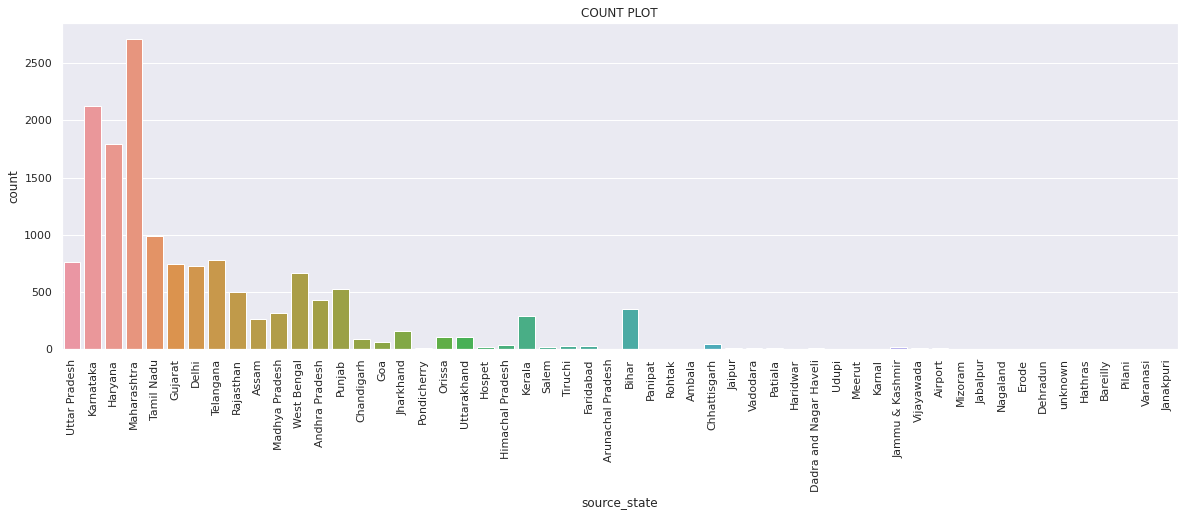

In [ ]:
# source_state 
# Busiest source state
univariateDiscrete(df2, 'source_state')

<font color='#0dab7f'><b>Observation</b>:Most of the orders are coming from state Maharashtra</font>

Describe Method
count           14817
unique             59
top       Maharashtra
freq             2530
Name: destination_state, dtype: object



Value count Method
Maharashtra      2530
Karnataka        2242
Haryana          1469
Tamil Nadu       1031
Uttar Pradesh     826
Telangana         812
Gujarat           753
West Bengal       676
Delhi             611
Punjab            583
Name: destination_state, dtype: int64


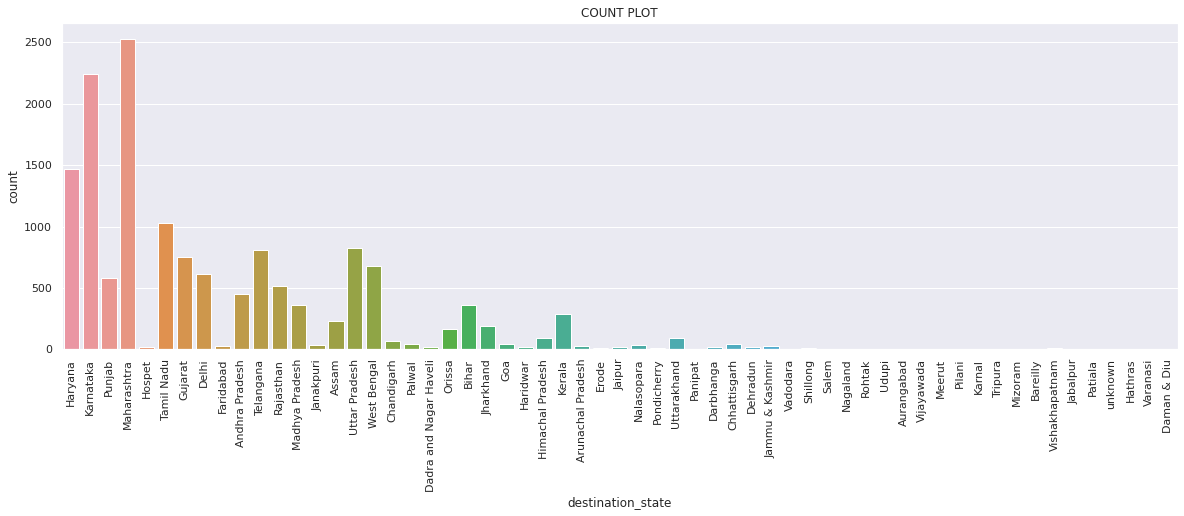

In [ ]:
# destination_state 
# Busiest destination state
univariateDiscrete(df2, 'destination_state')

<font color='#0dab7f'><b>Observation</b>:Most of the orders are delivered to state Maharashtra</font>

In [ ]:
# source city
# Busiest source city under busiest source state Maharastra
d = df2.loc[df2['source_state'] == 'Maharashtra', ['source_city']].value_counts().reset_index().head(10)
d.rename({0: 'count'}, axis=1, inplace = True)
d

,source_city,count
0,Mumbai,968
1,Bhiwandi,697
2,Pune,480
3,LowerParel,65
4,PNQ,62
5,Aurangabad,39
6,Dhule,33
7,Solapur,31
8,Akola,23
9,Pen,18


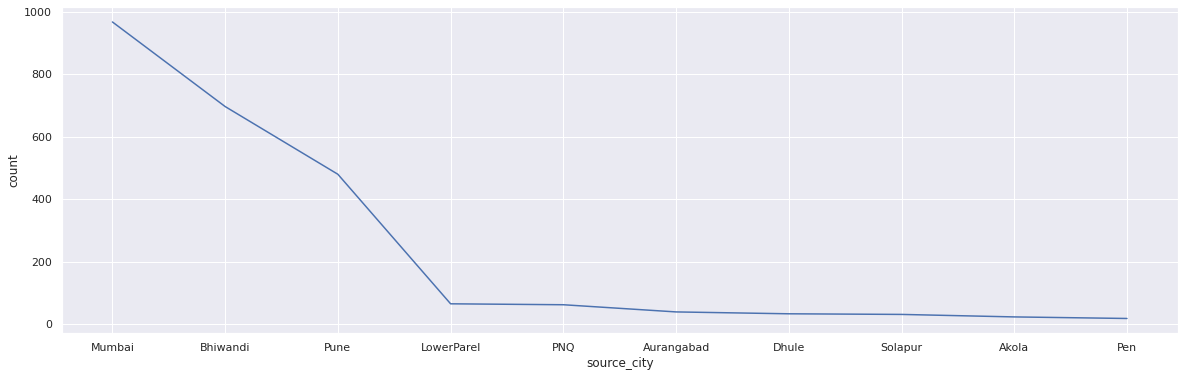

In [ ]:
sns.lineplot(data = d, x = 'source_city', y = 'count')
plt.show()

<font color='#0dab7f'><b>Observation</b>:Most of the orders are delivered from city Mumbai in Maharashtra state</font>

In [ ]:
#destination city
# Busiest destination city under busiest destination state Maharastra
d = df2.loc[df2['destination_state'] == 'Maharashtra', ['destination_city']].value_counts().reset_index().head(10)
d.rename({0: 'count'}, axis=1, inplace = True)
d

,destination_city,count
0,Mumbai,1084
1,Bhiwandi,566
2,Pune,293
3,PNQ,116
4,Aurangabad,41
5,Solapur,32
6,Kolhapur,24
7,Akola,23
8,Nashik,22
9,Jasai,19


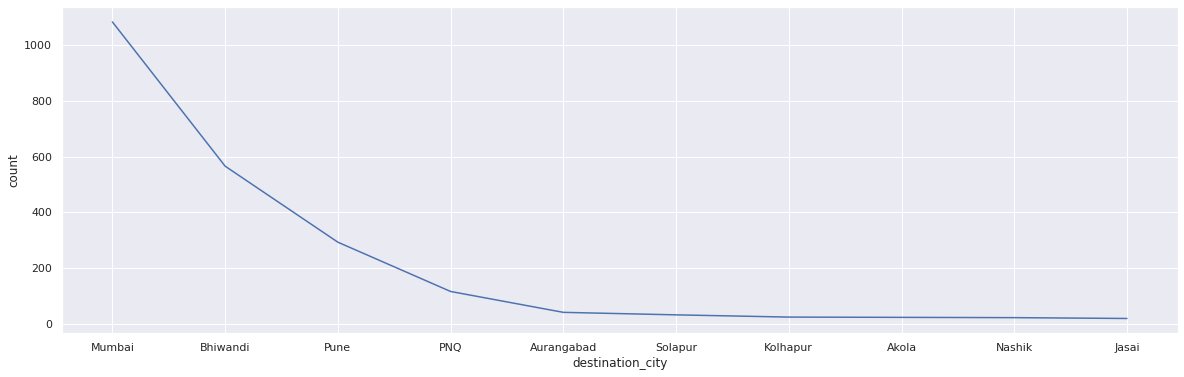

In [ ]:
sns.lineplot(data = d, x = 'destination_city', y = 'count')
plt.show()

<font color='#0dab7f'><b>Observation</b>:Most of the orders are delivered to city Mumbai in Maharashtra state, Hence busiest corridor under busiest state is Mumbai to Mumbai (round trip)</font>


<font color='#0dab7f'><b>Recommendation</b>: Company can increase their business by giving offers / discounts to busiest corridor under busiest state which is Mumbai to Mumbai (round trip) </font>

In [ ]:
# avg distance between the busiest corridor Maharastra (Mumbai) to Maharastra (Mumbai)
bc = df2.loc[((df2['source_city'] == 'Mumbai') & (df2['destination_city'] == 'Mumbai')), ['source_city','destination_city','actual_distance_to_destination']]
bc

,source_city,destination_city,actual_distance_to_destination
3,Mumbai,Mumbai,17.175274
34,Mumbai,Mumbai,13.479250
129,Mumbai,Mumbai,15.379308
146,Mumbai,Mumbai,11.347536
162,Mumbai,Mumbai,17.181435
...,...,...,...
14802,Mumbai,Mumbai,9.853394
14805,Mumbai,Mumbai,9.262988
14806,Mumbai,Mumbai,9.919745
14808,Mumbai,Mumbai,28.114091


In [ ]:
bc['actual_distance_to_destination'].mean()

14.628333194352873

<font color='#0dab7f'><b>Observation</b>:Average distance between the busiest corridor Mumbai to Mumbai is 14.62 km</font>

In [ ]:
# avg time between the busiest corridor Maharastra (Mumbai) to Maharastra (Mumbai)
bcTime = df2.loc[((df2['source_city'] == 'Mumbai') & (df2['destination_city'] == 'Mumbai')), ['source_city','destination_city','actual_time']]
bcTime

,source_city,destination_city,actual_time
3,Mumbai,Mumbai,59.0
34,Mumbai,Mumbai,48.0
129,Mumbai,Mumbai,67.0
146,Mumbai,Mumbai,31.0
162,Mumbai,Mumbai,50.0
...,...,...,...
14802,Mumbai,Mumbai,47.0
14805,Mumbai,Mumbai,25.0
14806,Mumbai,Mumbai,34.0
14808,Mumbai,Mumbai,86.0


In [ ]:
bcTime['actual_time'].mean()

55.29084380610413

<font color='#0dab7f'><b>Observation</b>:Average time between the busiest corridor Mumbai to Mumbai is 55.29 minutes</font>

##<font color='33A2FF'><b> **BIVARIATE ANALYSIS**

In [ ]:
# function for Continuous vs discrete BIVARIATE Analysis
def cont_discrete_bivarite(df, x_dis, y_con):
  plt.figure(figsize=(25,5))
  plt.subplot(1,3,1)
  plt.title("BOX PLOT")
  sns.boxplot(data = df, x= x_dis, y= y_con)
  plt.xticks(rotation = 90)
  plt.subplot(1,3,2)
  plt.title("VIOLIN PLOT")
  sns.violinplot(data = df, x= x_dis, y= y_con)
  plt.xticks(rotation = 90)
  plt.subplot(1,3,3)
  plt.title("BAR PLOT")
  sns.barplot(data = df, x= x_dis, y= y_con)
  plt.xticks(rotation = 90)
  plt.show()

In [ ]:
# function for discrete vs discrete BIVARIATE Analysis
def discrete_discrete_bivarite(df, x_dis, hue = None ):
  plt.figure(figsize=(15,5))
  plt.subplot(1,1,1)
  plt.title("COUNT PLOT")
  sns.countplot(data = df, x= x_dis, hue=hue)
  plt.show()

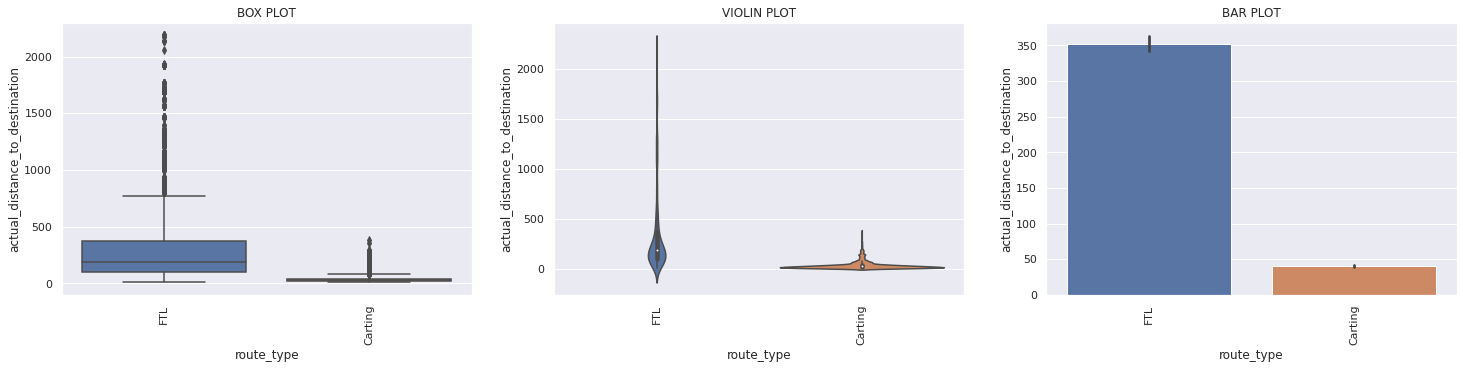

In [ ]:
# Bivariate actual_distance_to_destination and route_type
cont_discrete_bivarite(df2, 'route_type', 'actual_distance_to_destination')

<font color='#0dab7f'><b>Observation</b>:most of the long distance trip are FTL and longest distance trip in FTL is around 2100 kms</font>

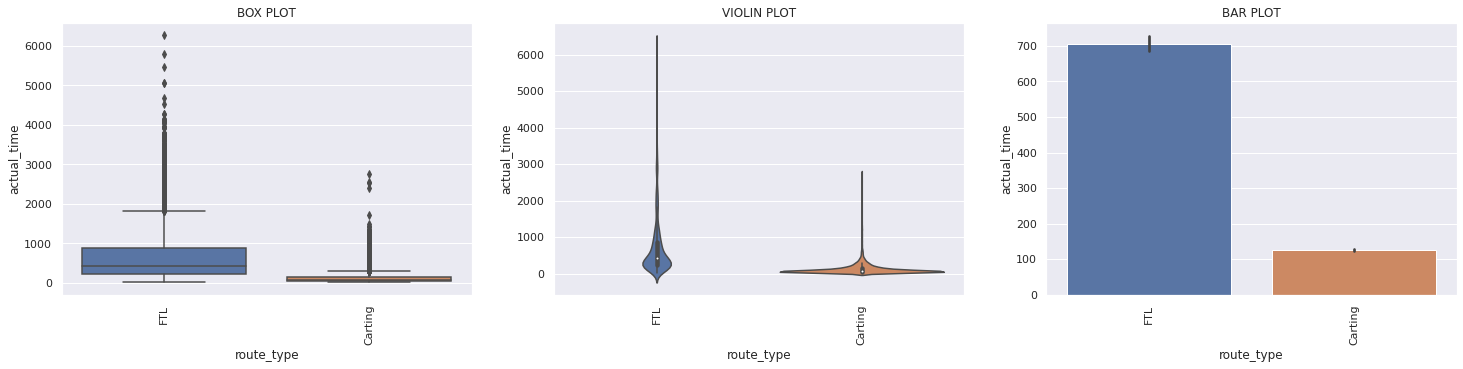

In [ ]:
# Bivariate actual_time and route_type
cont_discrete_bivarite(df2, 'route_type', 'actual_time')

<font color='#0dab7f'><b>Observation</b>:most of the long distance trip are FTL and longest distance trip takes time around 6000+ mins</font>

In [ ]:
import statsmodels.api as sm 
# function to check the distribution is gausian or not, if not gausian , do transformation using box cox and output the gausian curve 
def toCheckGuassian(df):
  sns.displot(df, kde = True)
  plt.plot()
  plt.title("distribution of group before applying transformation")
  fig = sm.qqplot(df, line = '45', fit = True)
  plt.plot()
  plt.title("qq plot of group before applying transformation")
  df_t, l = stats.boxcox(df) 
  fig = sm.qqplot(df_t, line = '45', fit = True)
  plt.plot()
  plt.title("qq plot of group after applying transformation")
  sns.displot(df_t, kde = True)
  plt.plot()
  plt.title("distribution of group after applying transformation")
  plt.tight_layout()
  return df_t, l

<font color='33A2FF'><b>1. Pearson’s Correlation coefficient Test to compare the linear relation between od_time_diff_mins and start_scan_to_end_scan.

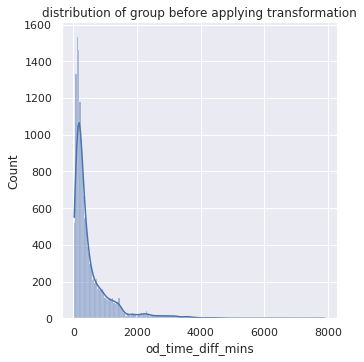

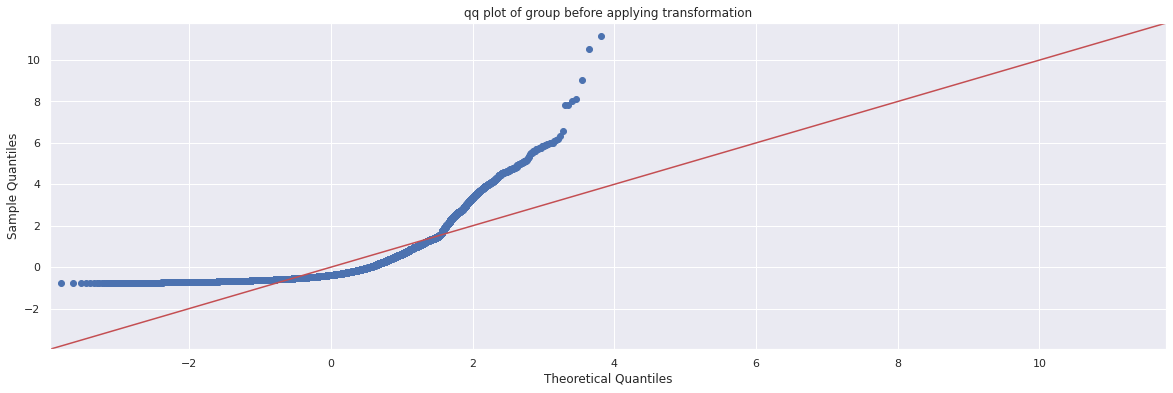

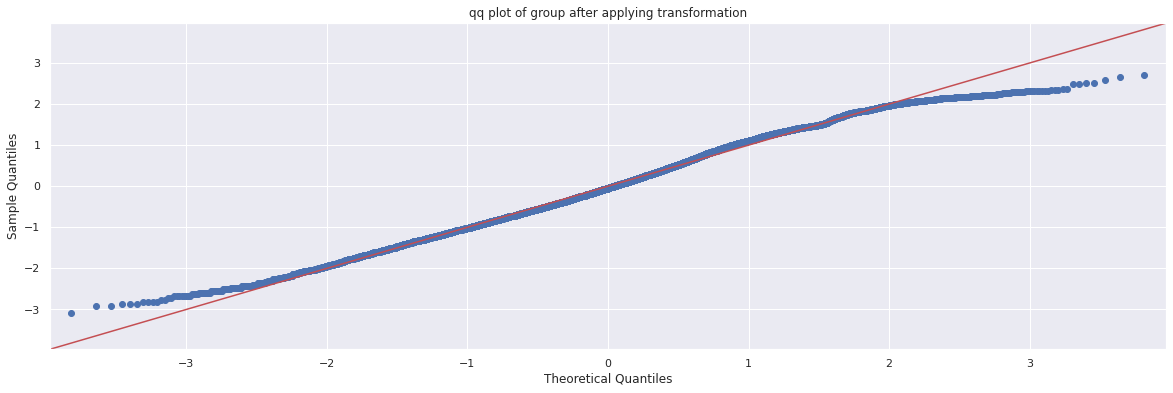

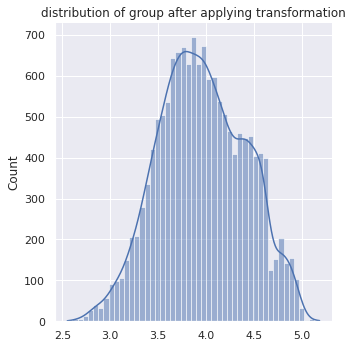

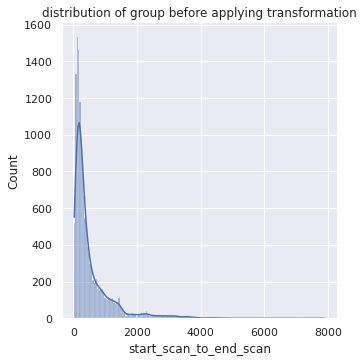

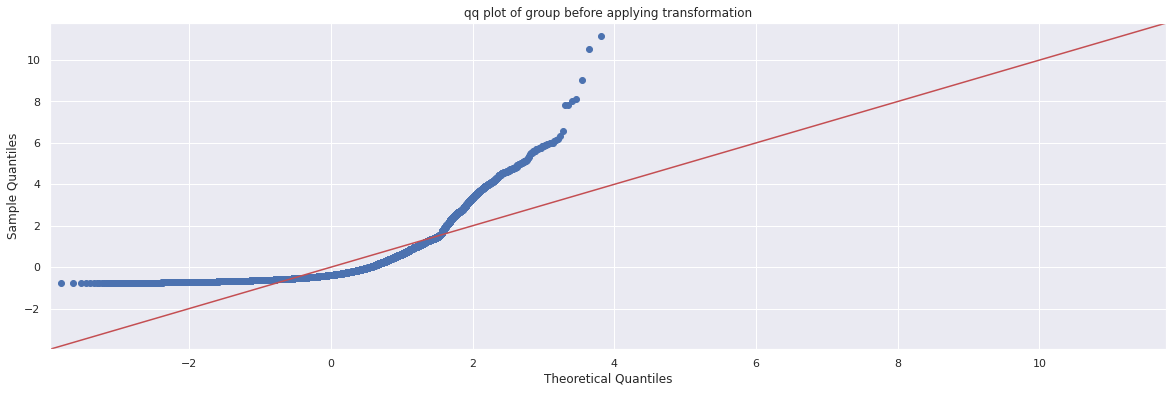

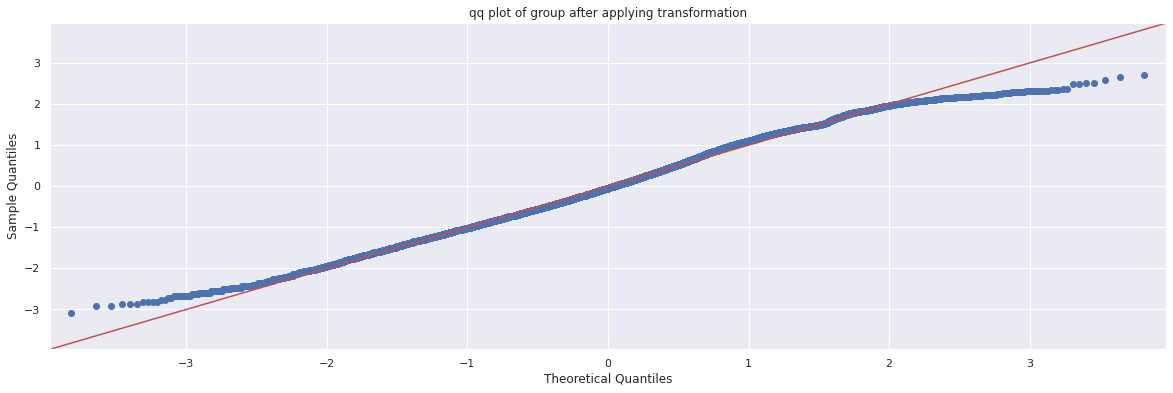

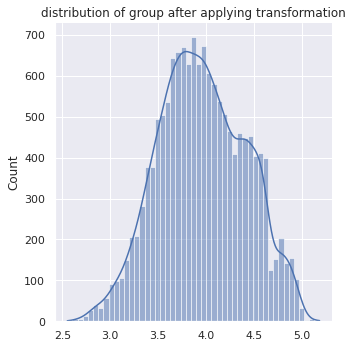

In [ ]:
# To check sample is normally distributed
df2['od_time_diff_mins'], l1 = toCheckGuassian(df2['od_time_diff_mins'])
df2['start_scan_to_end_scan'], l2 = toCheckGuassian(df2['start_scan_to_end_scan'])

In [ ]:
# to check sample have the same variance

s1 = np.std(df2['od_time_diff_mins'])
s2 = np.std(df2['start_scan_to_end_scan'])
print(s1, s2)

0.45300660069114407 0.4531194068118019


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


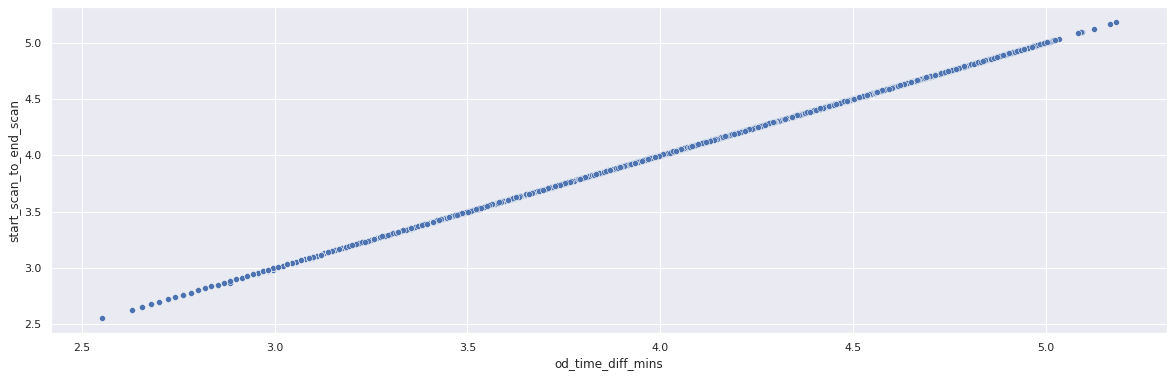

In [ ]:
sns.scatterplot(df2["od_time_diff_mins"], df2["start_scan_to_end_scan"])
plt.show()

In [ ]:
# Pearson’s Correlation coefficient Test to compare the linear relation between od_time_diff_mins and start_scan_to_end_scan.

#Assumptions:
#Observations in each sample are independent and identically distributed (iid).
#Observations in each sample are normally distributed (Distribution nearly looks like gausian after applying transformation).
#Observations in each sample have the same variance (roughly the same).

#Interpretation:
#H0: od_time_diff_mins and start_scan_to_end_scan are independent.
#H1: od_time_diff_mins and start_scan_to_end_scan are dependent.


stat, p = stats.pearsonr(df2['od_time_diff_mins'], df2['start_scan_to_end_scan'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably dependent')
else:
	print('Probably independent')

stat=1.000, p=0.000
Probably independent


<font color='#0dab7f'><b>Observation</b>: P Value is  0% which is less than alpha 5% so we reject Null hypothesis. Hence according to correlation test od_time_diff_mins is having linear relationship with start_scan_to_end_scan</font>

<font color='33A2FF'><b>2. Pearson’s Correlation coefficient Test to compare the linear relation between actual_time and osrm_time.

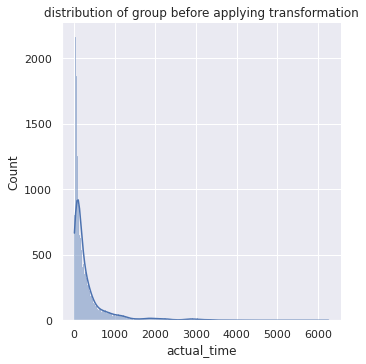

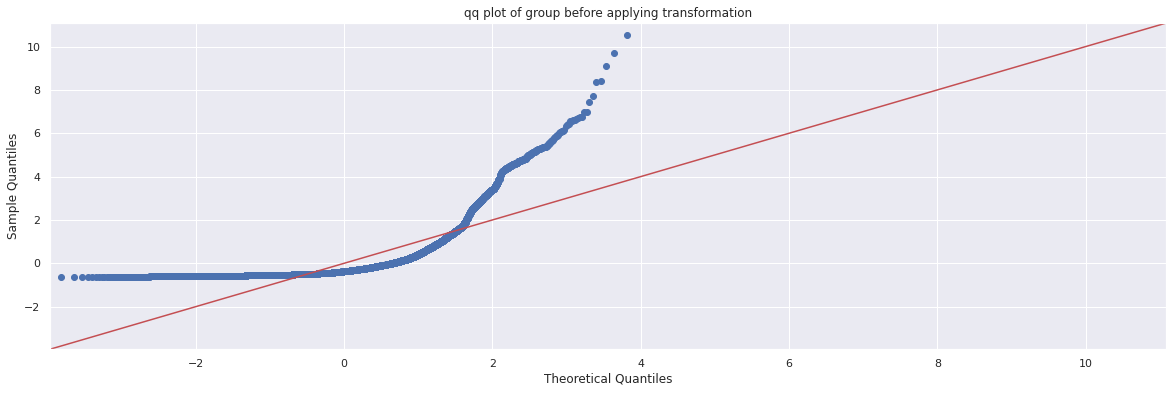

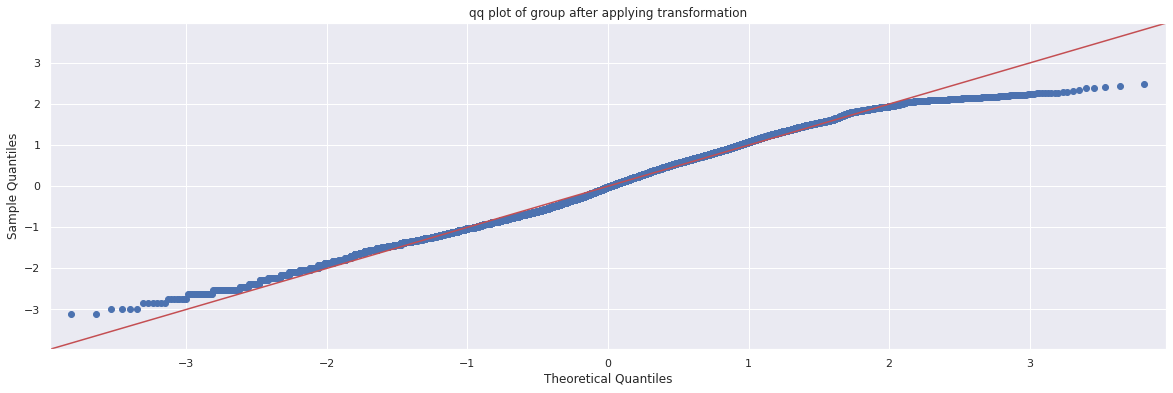

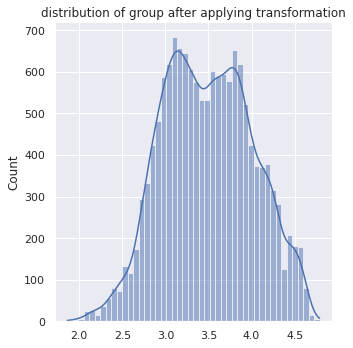

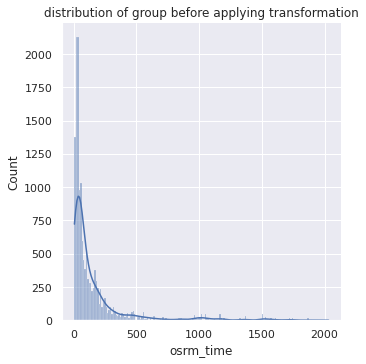

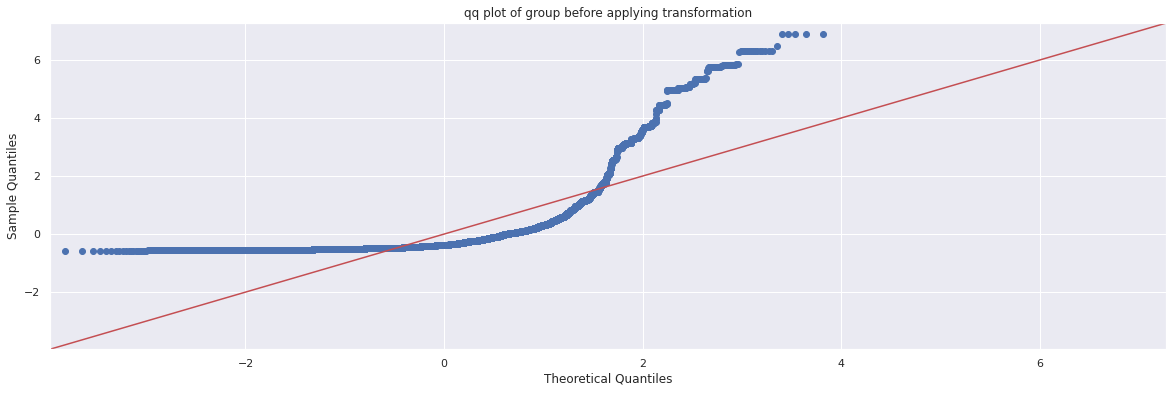

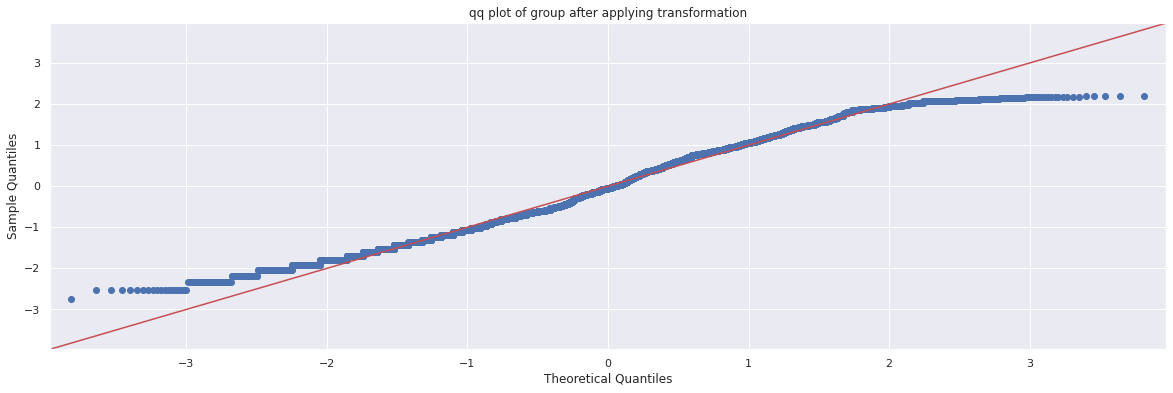

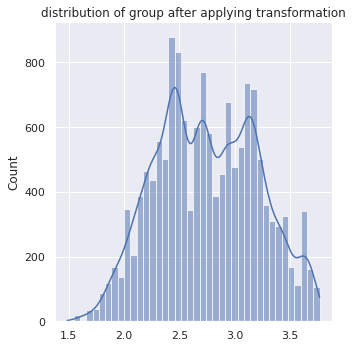

In [ ]:
# To check sample is normally distributed
df2['actual_time'], l1 = toCheckGuassian(df2['actual_time'])
df2['osrm_time'], l2 = toCheckGuassian(df2['osrm_time'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


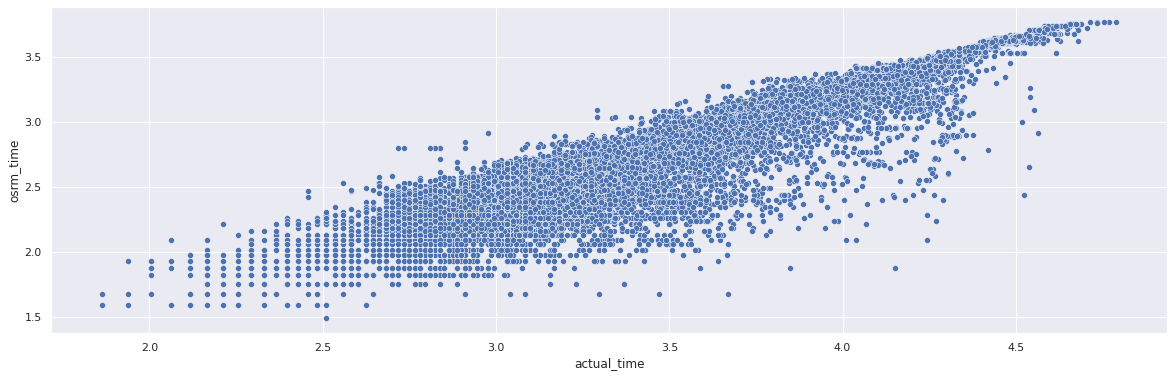

In [ ]:
sns.scatterplot(df2["actual_time"], df2["osrm_time"])
plt.show()

In [ ]:
# to check sample have the same variance
s1 = np.std(df2['actual_time'])
s2 = np.std(df2['osrm_time'])
print(s1, s2)

0.5222072591958828 0.45872484210204606


In [ ]:
# Pearson’s Correlation coefficient Test to compare the linear relation between actual_time and osrm_time.

#Assumptions:
#Observations in each sample are independent and identically distributed (iid).
#Observations in each sample are normally distributed (Distribution nearly looks like gausian after applying transformation).
#Observations in each sample have the same variance (roughly the same).

#Interpretation:
#H0: actual_time and osrm_time are independent.
#H1: actual_time and osrm_time are dependent.


stat, p = stats.pearsonr(df2['actual_time'], df2['osrm_time'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably dependent')
else:
	print('Probably independent')

stat=0.912, p=0.000
Probably independent


<font color='#0dab7f'><b>Observation</b>: P Value is  0% which is less than alpha 5% so we reject Null hypothesis. Hence according to correlation test actual_time is is having linear relationship with osrm_time</font>

<font color='33A2FF'><b>3. Pearson’s Correlation coefficient Test to compare the linear relation between  actual_time and segment_actual_time.

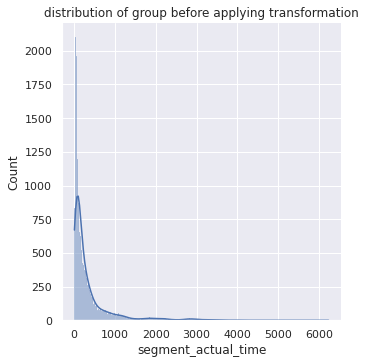

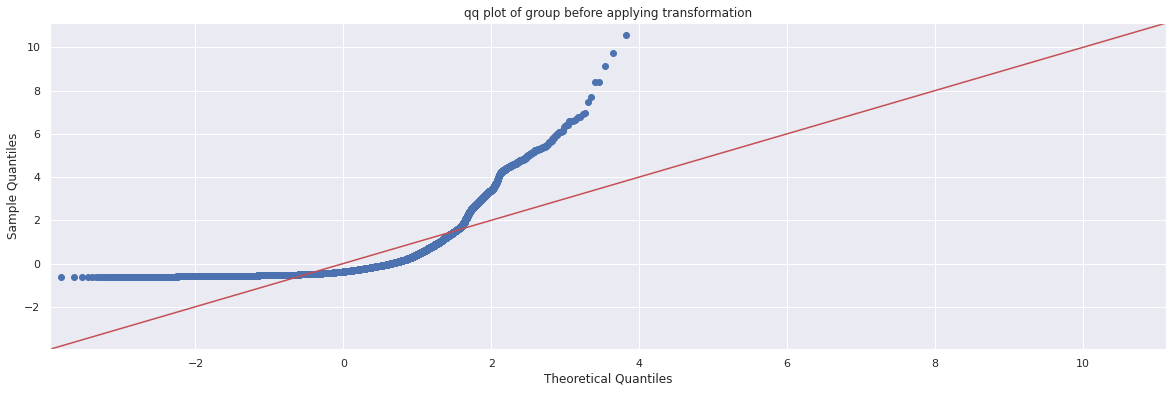

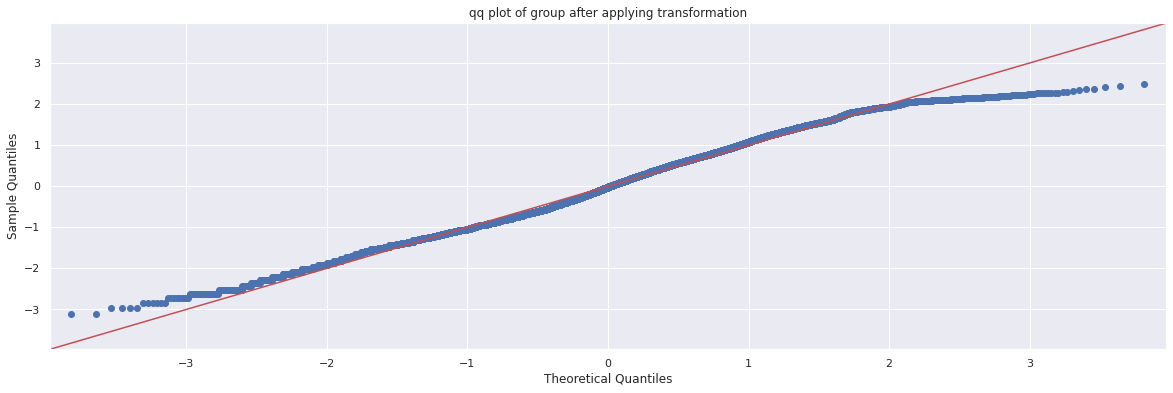

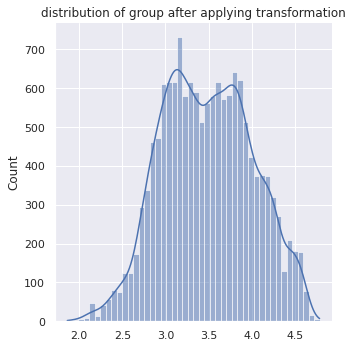

In [ ]:
# To check sample is normally distributed
#df2['actual_time'], l1 = toCheckGuassian(df2['actual_time']) ===> Box cox transformation has been already applied to Actual time 
df2['segment_actual_time'], l2 = toCheckGuassian(df2['segment_actual_time'])

In [ ]:
# to check sample have the same variance
s1 = np.std(df2['actual_time'])
s2 = np.std(df2['segment_actual_time'])
print(s1, s2)

0.5222072591958828 0.5232773966593189


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


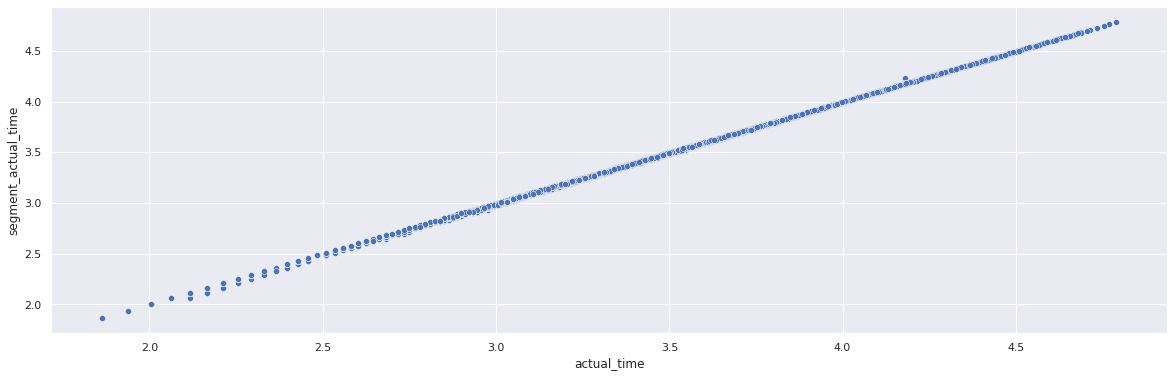

In [ ]:
sns.scatterplot(df2["actual_time"], df2["segment_actual_time"])
plt.show()

In [ ]:
# Pearson’s Correlation coefficient Test to compare the linear relation between actual_time and segment_actual_time.

#Assumptions:
#Observations in each sample are independent and identically distributed (iid).
#Observations in each sample are normally distributed (Distribution nearly looks like gausian after applying transformation).
#Observations in each sample have the same variance (roughly the same).

#Interpretation:
#H0: actual_time and segment_actual_time are independent.
#H1: actual_time and segment_actual_time are dependent.


stat, p = stats.pearsonr(df2['actual_time'], df2['segment_actual_time'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably dependent')
else:
	print('Probably independent')

stat=1.000, p=0.000
Probably independent


<font color='#0dab7f'><b>Observation</b>: P Value is  0% which is less than alpha 5% so we reject Null hypothesis. Hence according to correlation test actual_time is having linear relationship with segment_actual_time</font>

<font color='33A2FF'><b>4. Pearson’s Correlation coefficient Test to compare the linear relation between osrm_distance and segment_osrm_distance.

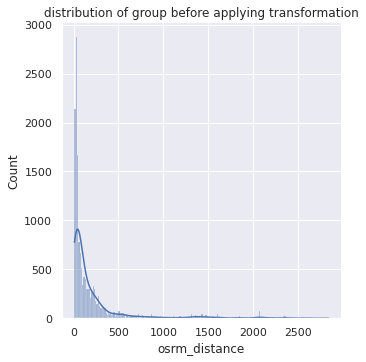

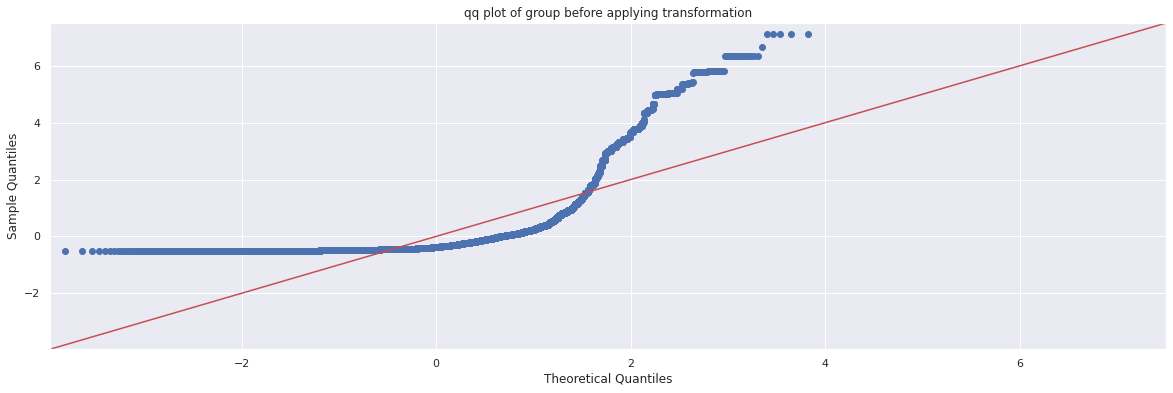

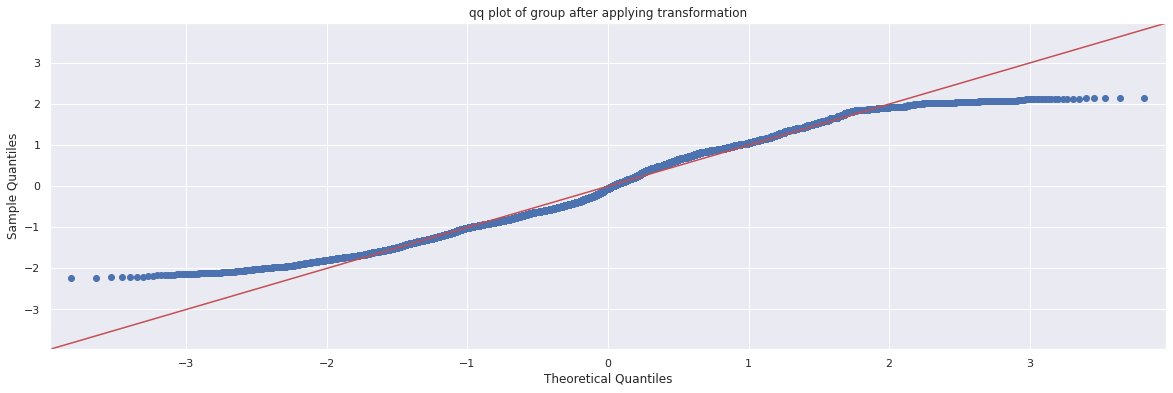

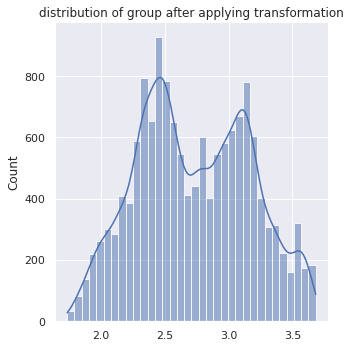

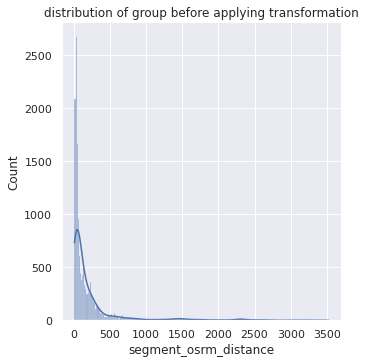

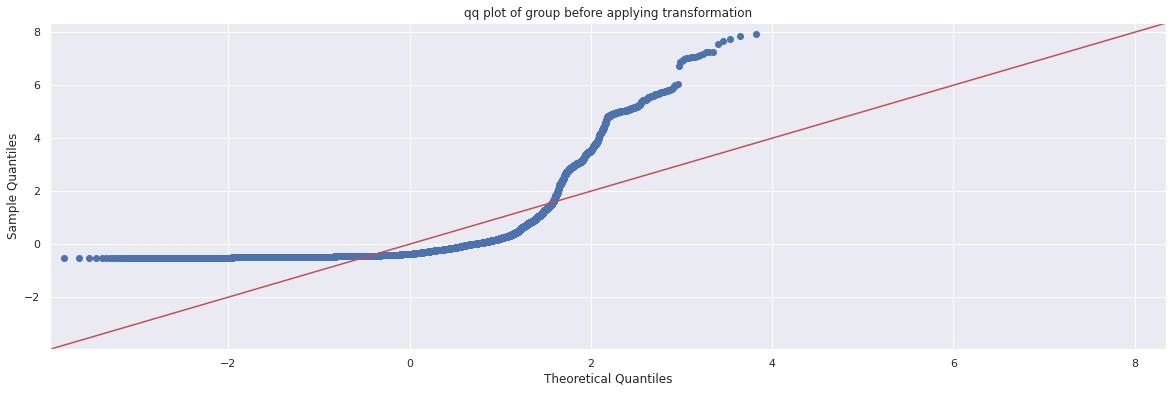

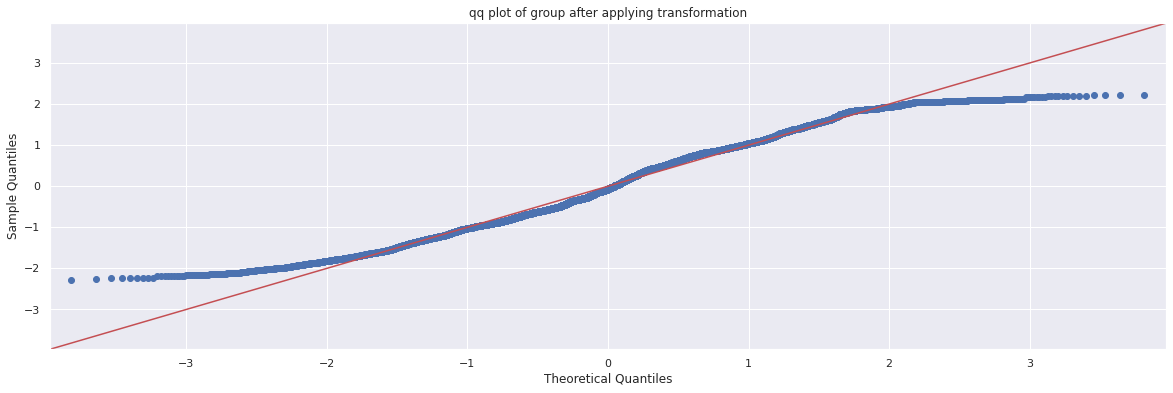

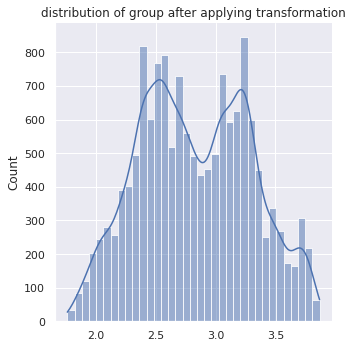

In [ ]:
# To check sample is normally distributed
df2['osrm_distance'], l1 = toCheckGuassian(df2['osrm_distance'])
df2['segment_osrm_distance'], l2 = toCheckGuassian(df2['segment_osrm_distance'])

In [ ]:
# to check sample have the same variance
s1 = np.std(df2['osrm_distance'])
s2 = np.std(df2['segment_osrm_distance'])
print(s1, s2)

0.44217572980367337 0.46867240251396247


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


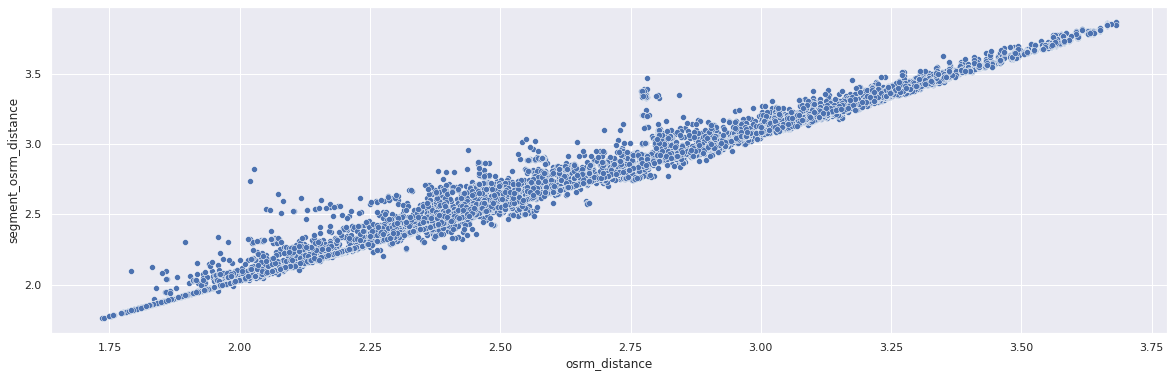

In [ ]:
sns.scatterplot(df2["osrm_distance"], df2["segment_osrm_distance"])
plt.show()

In [ ]:
# Pearson’s Correlation coefficient Test to compare the linear relation between osrm_distance and segment_osrm_distance.

#Assumptions:
#Observations in each sample are independent and identically distributed (iid).
#Observations in each sample are normally distributed (Distribution nearly looks like gausian after applying transformation).
#Observations in each sample have the same variance (roughly the same).

#Interpretation:
#H0: osrm_distance and segment_osrm_distance are independent.
#H1: osrm_distance and segment_osrm_distance are dependent.


stat, p = stats.pearsonr(df2['osrm_distance'], df2['segment_osrm_distance'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably dependent')
else:
	print('Probably independent')

stat=0.992, p=0.000
Probably independent


<font color='#0dab7f'><b>Observation</b>: P Value is  0% which is less than alpha 5% so we reject Null hypothesis. Hence according to correlation test osrm_distance is having linear relationship with segment_osrm_distance</font>

<font color='33A2FF'><b>5. Pearson’s Correlation coefficient Test to compare the linear relation between osrm_time and segment_osrm_time.

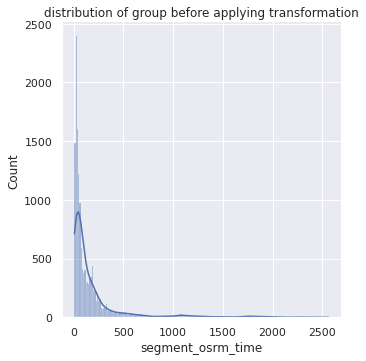

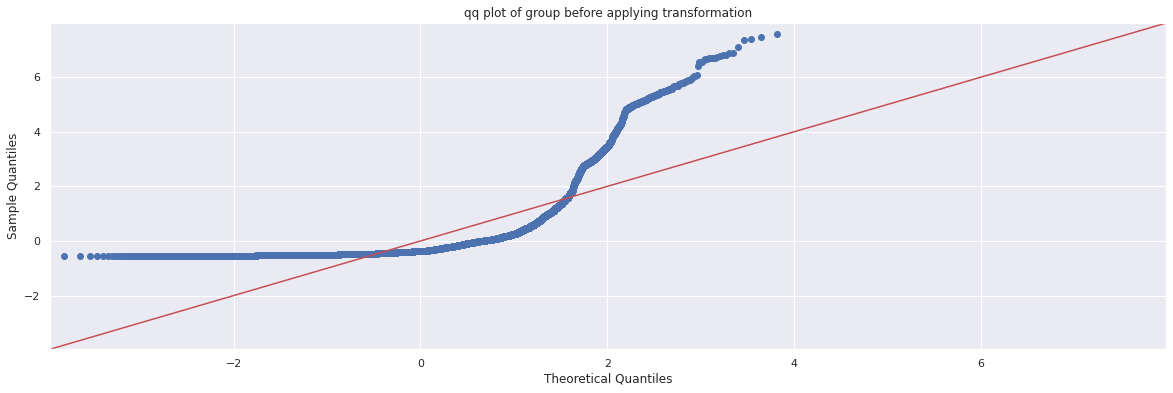

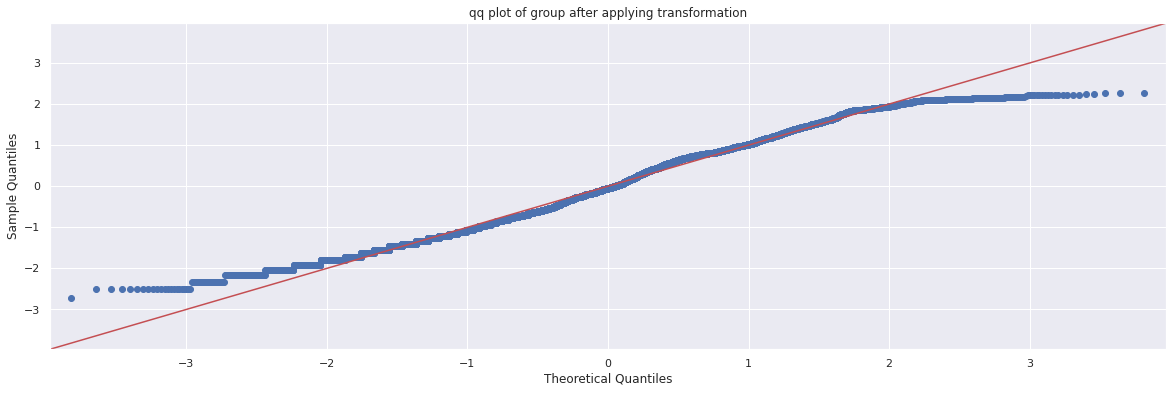

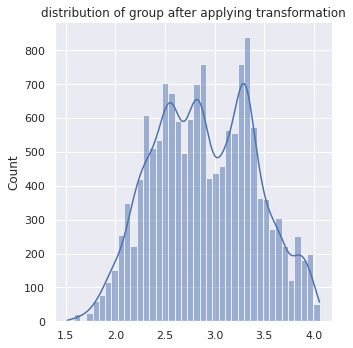

In [ ]:
# To check sample is normally distributed
# df2['osrm_time'] ===> Box cox transformation has been already applied to osrm_time 
df2['segment_osrm_time'], l2 = toCheckGuassian(df2['segment_osrm_time'])

In [ ]:
# to check sample have the same variance
s1 = np.std(df2['osrm_time'])
s2 = np.std(df2['segment_osrm_time'])
print(s1, s2)

0.45872484210204606 0.5103341192442986


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


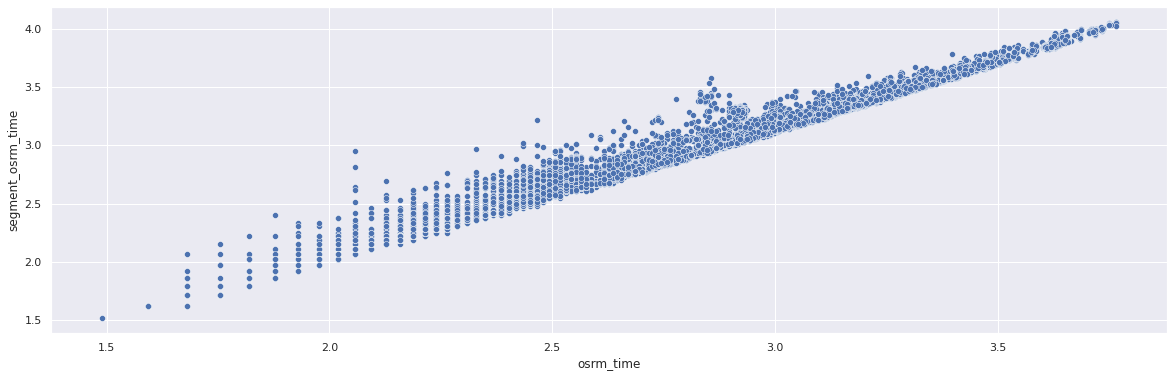

In [ ]:
sns.scatterplot(df2["osrm_time"], df2["segment_osrm_time"])
plt.show()

In [ ]:
# Pearson’s Correlation coefficient Test to compare the linear relation between osrm_time and segment_osrm_time.

#Assumptions:
#Observations in each sample are independent and identically distributed (iid).
#Observations in each sample are normally distributed (Distribution nearly looks like gausian after applying transformation).
#Observations in each sample have the same variance (roughly the same).

#Interpretation:
#H0: osrm_time and segment_osrm_time are independent.
#H1: osrm_time and segment_osrm_time are dependent.


stat, p = stats.pearsonr(df2['osrm_time'], df2['segment_osrm_time'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably dependent')
else:
	print('Probably independent')

stat=0.991, p=0.000
Probably independent


<font color='#0dab7f'><b>Observation</b>: P Value is  0% which is less than alpha 5% so we reject Null hypothesis. Hence according to correlation test osrm_time is independent segment_osrm_time</font>

**<font color='33A2FF'><b>CORRELATION MATRIX**

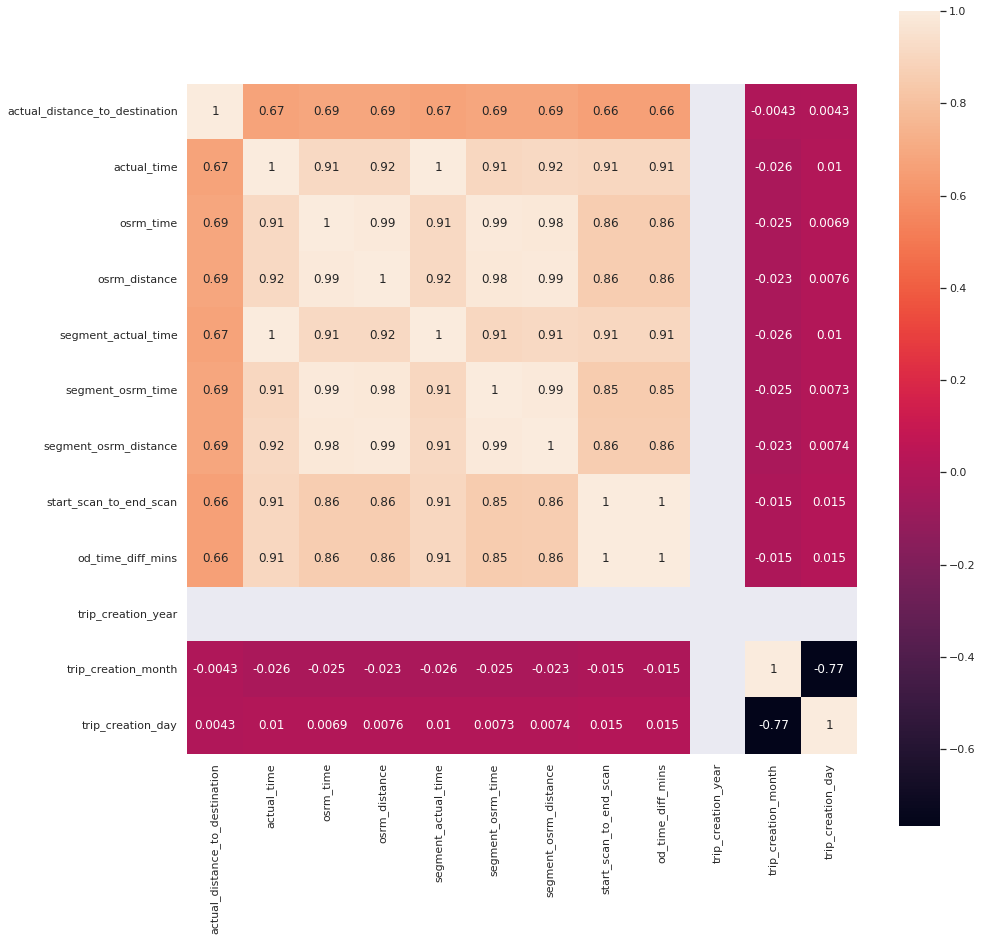

In [ ]:
plt.figure(figsize = (15, 15))
sns.heatmap(df2.corr(method= 'pearson'), square = True, annot = True)
plt.show()

<font color='#0dab7f'><b>Observation</b>: 

<font color='#0dab7f'> 1) od_time_diff_mins and start_scan_to_end_scan are highly positive correlated with value 1. Hence we can remove any one column and can do analysis with other column. </font>

<font color='#0dab7f'> 2) actual_time and osrm_time are highly positive correlated with value 0.91. Hence we can remove any one column and can do analysis with other column. </font>

<font color='#0dab7f'>3) actual_time and segment_actual_time are highly positive correlated with value 1. Hence we can remove any one column and can do analysis with other column. </font>

 <font color='#0dab7f'>4) osrm_distance and segment_osrm_distance are highly positive correlated with value 0.99. Hence we can remove any one column and can do analysis with other column. </font>

<font color='#0dab7f'>5) osrm_time and segment_osrm_time are highly positive correlated with value 0.99. Hence we can remove any one column and can do analysis with other column.</font>

<font color='33A2FF'><b> Find outliers in the numerical variables and check it using visual analysis

In [ ]:
#Numerical columns
df2[['actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',\
           'segment_osrm_time', 'segment_osrm_distance', 'start_scan_to_end_scan', 'od_time_diff_mins']]

,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,start_scan_to_end_scan,od_time_diff_mins
0,824.732854,4.389694,3.536017,3.486639,4.384800,3.830249,3.677344,4.779772,4.779217
1,73.186911,3.463184,2.782760,2.799667,3.455502,2.872751,2.867879,3.723837,3.723527
2,1927.404273,4.619864,3.734885,3.650835,4.614245,3.993716,3.809740,4.966536,4.965927
3,17.175274,3.023215,2.057355,2.165836,3.022370,2.150469,2.210848,3.421938,3.421682
4,127.448500,3.840199,2.991205,2.986767,3.837549,3.115461,3.071674,4.345439,4.344997
...,...,...,...,...,...,...,...,...,...
14812,57.762332,3.200011,2.744814,2.745053,3.192935,2.851433,2.763583,3.895342,3.894999
14813,15.513784,2.427461,1.929054,2.060945,2.426940,1.922192,2.096482,3.139227,3.139015
14814,38.684839,3.762059,2.635690,2.659590,3.759186,3.004928,2.951353,4.119707,4.119317
14815,134.723836,3.734388,3.138493,3.035352,3.723317,3.362618,3.210561,4.033622,4.033250


In [ ]:
def outlierRemoval(df, col): 
  r = 1.5 * stats.iqr(df[col])
  lb = max(np.percentile(df[col], 25) - r, 0)
  ub = np.percentile(df[col], 75) + r
  df = df[(df[i]>=lb) & (df[i]<=ub)]
  return df

In [ ]:
# Function to calculate outlier range
def outlier(df, col): 
  r = 1.5 * stats.iqr(df[col])
  lb = max(np.percentile(df[col], 25) - r, 0)
  ub = np.percentile(df[col], 75) + r
  print(" ")
  print('\033[1m'+'\033[95m' +'OUTLIER FOR COLUMN : '+ col )
  print("Outliers:",sum(df[col] > ub) + sum(df[col] < lb))
  print("Lower limit", lb)
  print("Upper limit", ub ,'\033[0m')

In [ ]:
#Using scipy.stats.mstats.winsorize 
# lowest value and the highest values are replaced using the limits.
def outlierTreatment(df, col, limit):
  df2_O = pd.DataFrame(stats.mstats.winsorize(df[col], limits = [limit,limit])) 
  df2_O = df2_O.rename({0: col}, axis = 1) #Change Column Name
  # Visualizing a Box Plot before and after Winsorization
  sns.set(rc={'figure.figsize':(20,6)}) 
  fig, (ax1, ax2) = plt.subplots(ncols = 2, sharey = True) #Put 2 Plots side by side
  plt1 = sns.boxplot(x = df2[col], palette = "Set1", ax = ax1).set(title='before Winsorization')
  plt2 = sns.boxplot(x = df2_O[col], palette = "Set2", ax = ax2).set(title= 'after Winsorization')
  return df2_O

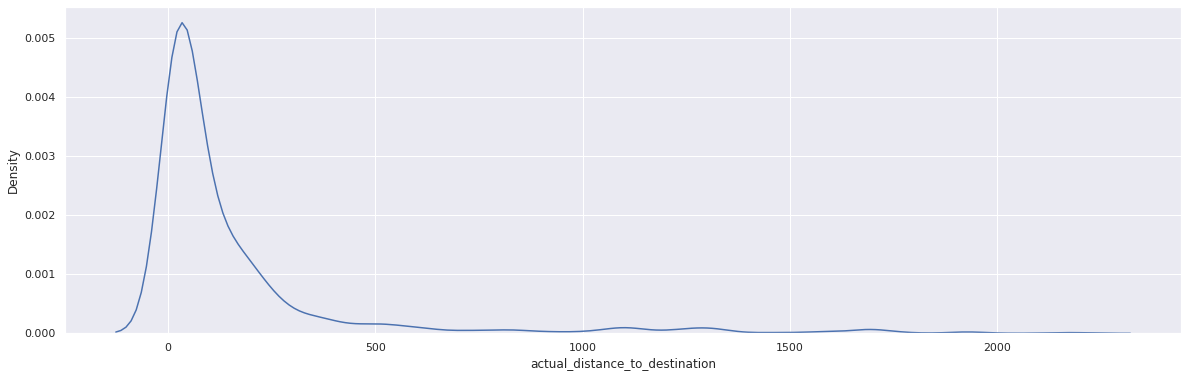

In [ ]:
sns.kdeplot(df2['actual_distance_to_destination'])
plt.show()

In [ ]:
# actual_distance_to_destination - before outlier treatment
outlier(df2, 'actual_distance_to_destination')

 
OUTLIER FOR COLUMN : actual_distance_to_destination
Outliers: 1449
Lower limit 0
Upper limit 377.2021605081386 


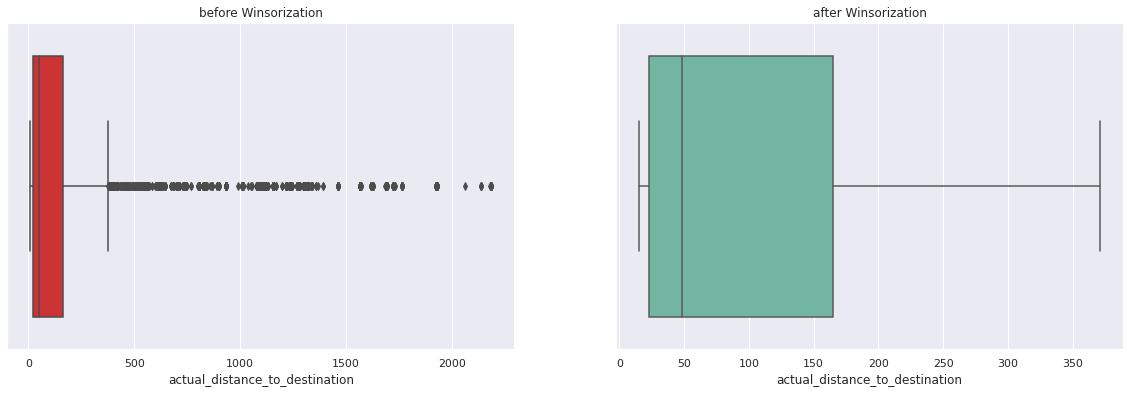

In [ ]:
# As the data is right skewed, hence IQR is not effective in removing the outlier so applying winsorize to treat the outlier. 
df2['actual_distance_to_destination'] = outlierTreatment(df2, 'actual_distance_to_destination', 0.10)

In [ ]:
# actual_distance_to_destination - after outlier treatment
outlier(df2, 'actual_distance_to_destination')

 
OUTLIER FOR COLUMN : actual_distance_to_destination
Outliers: 0
Lower limit 0
Upper limit 377.2021605081386 


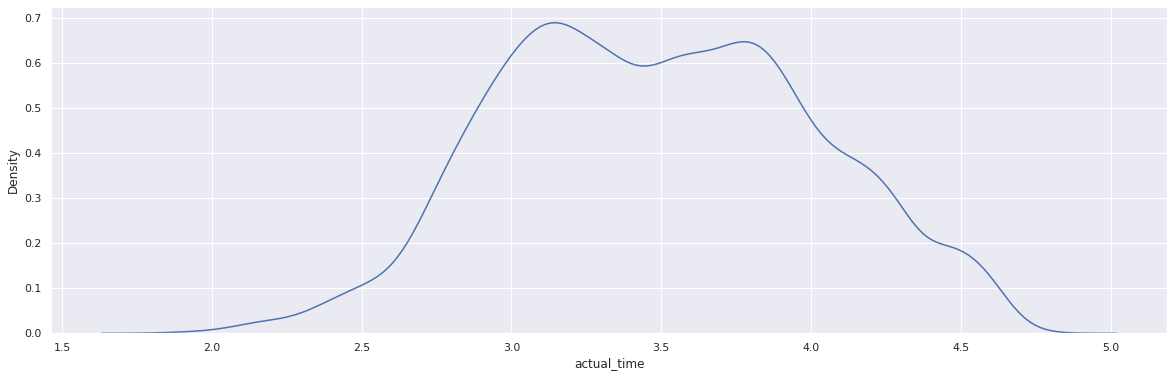

In [ ]:
sns.kdeplot(df2['actual_time'])
plt.show()

In [ ]:
# actual_time - before outlier treatment
outlier(df2, 'actual_time')

 
OUTLIER FOR COLUMN : actual_time
Outliers: 2
Lower limit 1.9158361327351765
Upper limit 5.04741099967489 


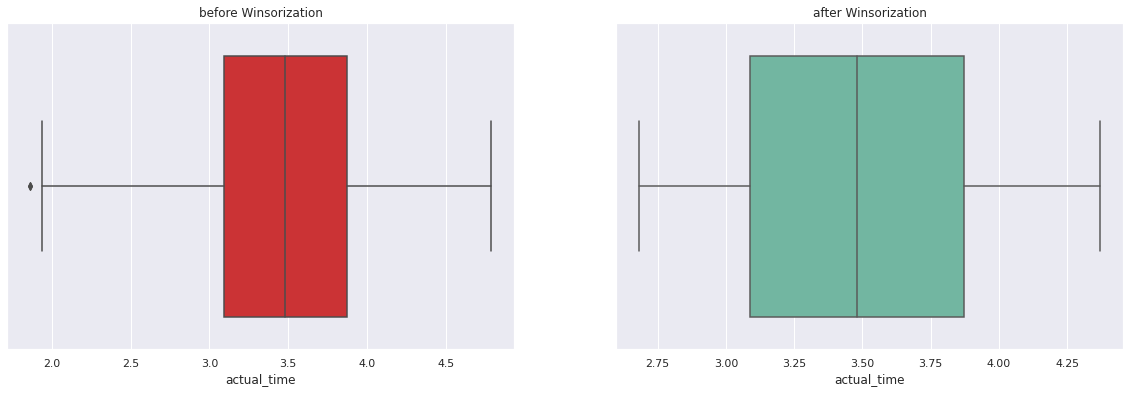

In [ ]:
# Initial data is right skewed, While verifying assumption for pearson coefficient we have applied box cox transform 
#on this column hence there is little outlier. So we are applying IQR technique to impute the outlier
df2['actual_time'] = outlierTreatment(df2, 'actual_time', 0.05)

In [ ]:
# actual_time - after outlier treatment
outlier(df2, 'actual_time')

 
OUTLIER FOR COLUMN : actual_time
Outliers: 0
Lower limit 1.9158361327351765
Upper limit 5.04741099967489 


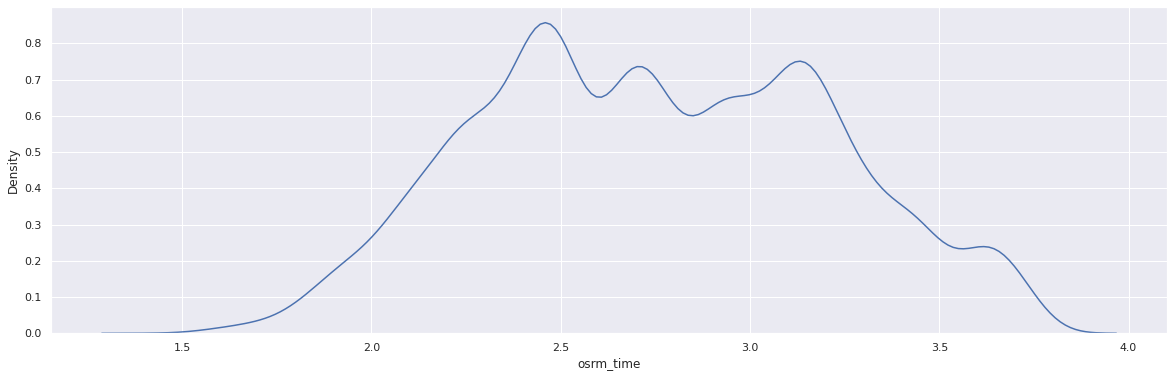

In [ ]:
sns.kdeplot(df2['osrm_time'])
plt.show()

In [ ]:
# osrm_time - before outlier treatment
outlier(df2, 'osrm_time')

 
OUTLIER FOR COLUMN : osrm_time
Outliers: 0
Lower limit 1.330526863958497
Upper limit 4.189463586265887 


<font color='#0dab7f'>Initial data is right skewed, While verifying assumption for pearson coefficient we have applied box cox transform on this column hence there is no outlier. So no need to apply IQR technique

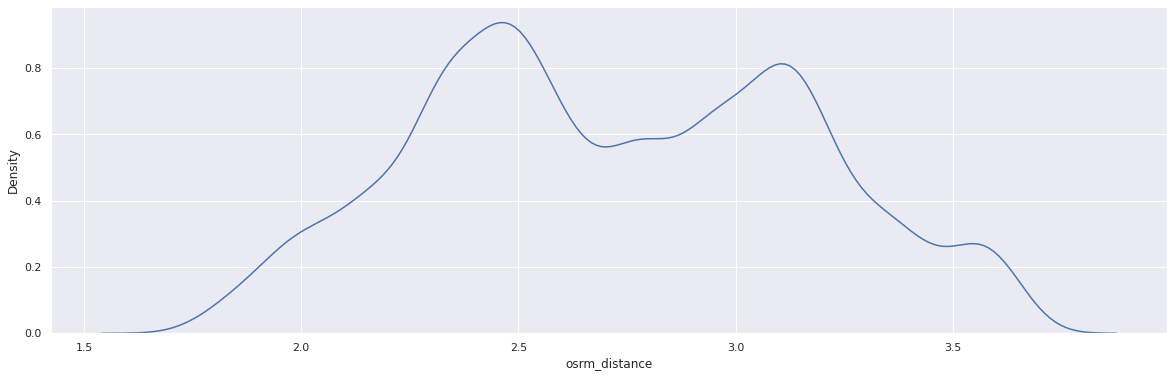

In [ ]:
sns.kdeplot(df2['osrm_distance'])
plt.show()

In [ ]:
# osrm_distance - before outlier treatment
outlier(df2, 'osrm_distance')

 
OUTLIER FOR COLUMN : osrm_distance
Outliers: 0
Lower limit 1.3136900951644959
Upper limit 4.1646040776538324 


<font color='#0dab7f'>Initial data is right skewed, While verifying assumption for pearson coefficient we have applied box cox transform on this column hence there is no outlier. So no need to apply IQR technique

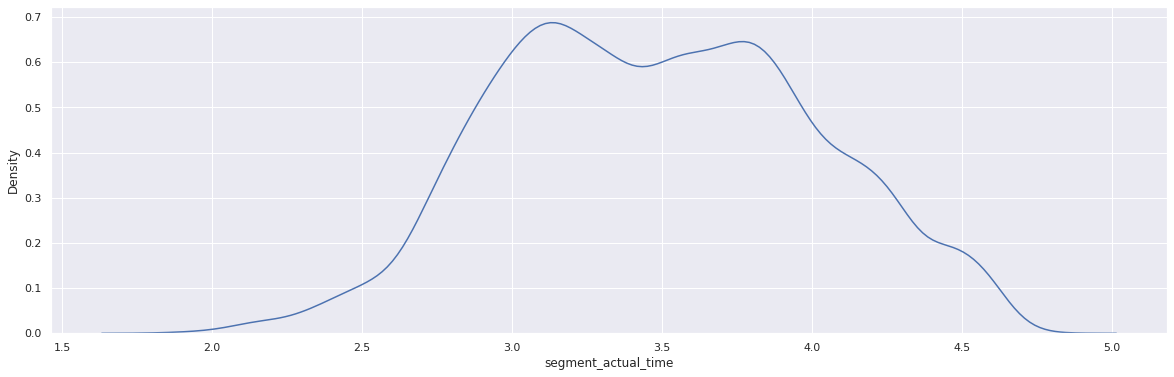

In [ ]:
sns.kdeplot(df2['segment_actual_time'])
plt.show()

In [ ]:
# segment_actual_time - before outlier treatment
outlier(df2, 'segment_actual_time')

 
OUTLIER FOR COLUMN : segment_actual_time
Outliers: 2
Lower limit 1.9011234305222777
Upper limit 5.048643434678354 


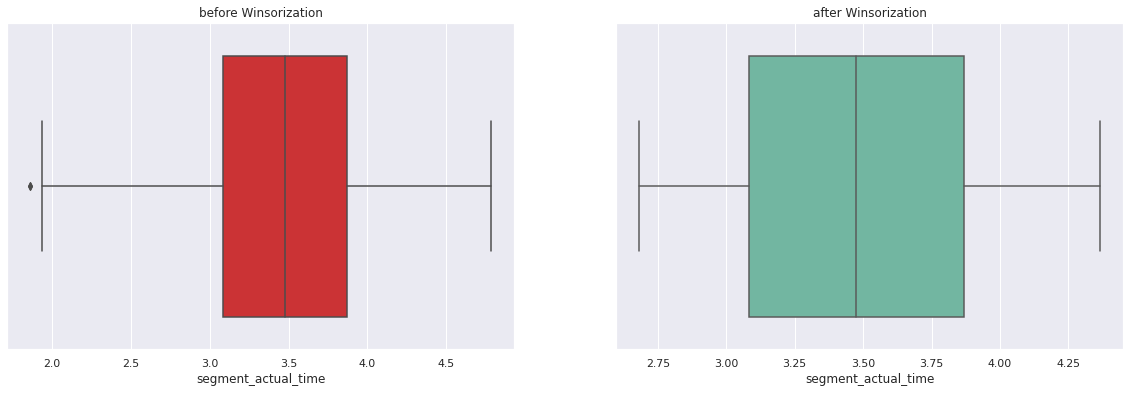

In [ ]:
# Initial data is right skewed, While verifying assumption for pearson coefficient we have applied box cox transform 
#on this column hence there is little outlier. So we are applying IQR technique to impute the outlier 
df2['segment_actual_time'] = outlierTreatment(df2, 'segment_actual_time', 0.05)

In [ ]:
# segment_actual_time - after outlier treatment
outlier(df2, 'segment_actual_time')

 
OUTLIER FOR COLUMN : segment_actual_time
Outliers: 0
Lower limit 1.9011234305222777
Upper limit 5.048643434678354 


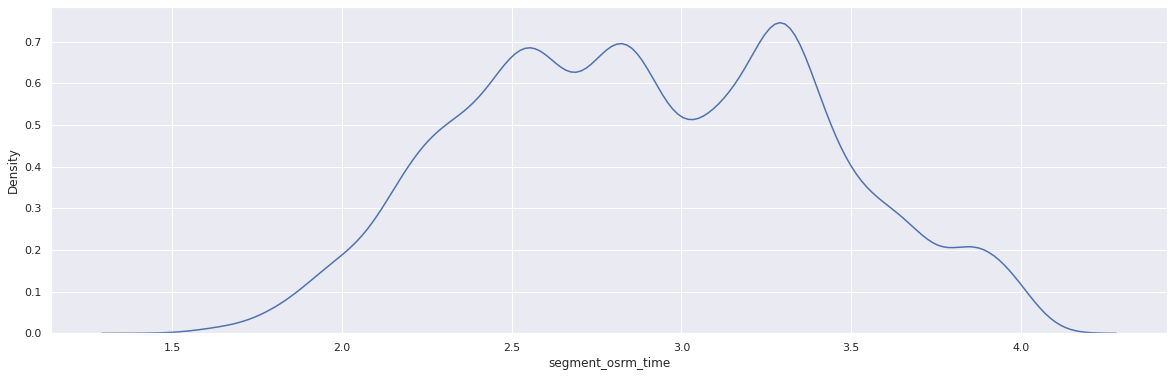

In [ ]:
sns.kdeplot(df2['segment_osrm_time'])
plt.show()

In [ ]:
# segment_osrm_time - before outlier treatment
outlier(df2, 'segment_osrm_time')

 
OUTLIER FOR COLUMN : segment_osrm_time
Outliers: 0
Lower limit 1.3411176481366016
Upper limit 4.472736926142667 


<font color='#0dab7f'>Initial data is right skewed, While verifying assumption for pearson coefficient we have applied box cox transform on this column hence there is no outlier. So no need to apply IQR technique

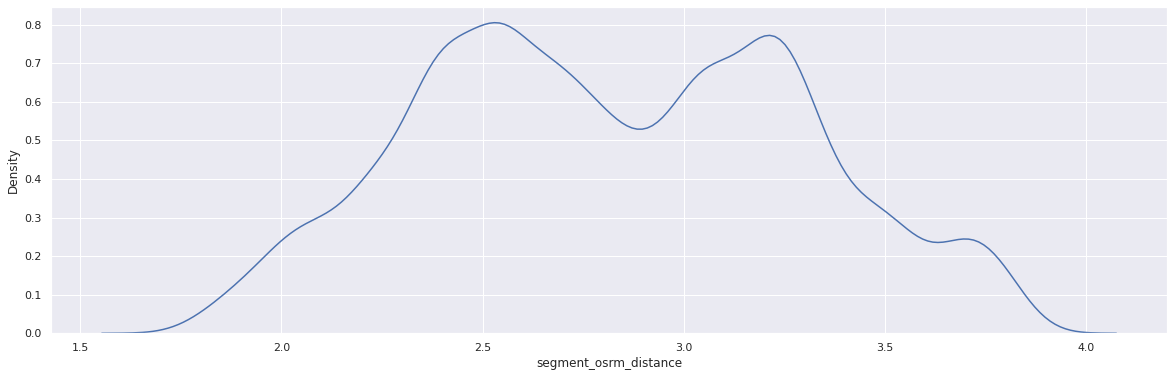

In [ ]:
sns.kdeplot(df2['segment_osrm_distance'])
plt.show()

In [ ]:
# segment_osrm_distance - before outlier treatment
outlier(df2, 'segment_osrm_distance')

 
OUTLIER FOR COLUMN : segment_osrm_distance
Outliers: 0
Lower limit 1.344149418237573
Upper limit 4.31958085889032 


<font color='#0dab7f'>Initial data is right skewed, While verifying assumption for pearson coefficient we have applied box cox transform on this column hence there is no outlier. So no need to apply IQR technique

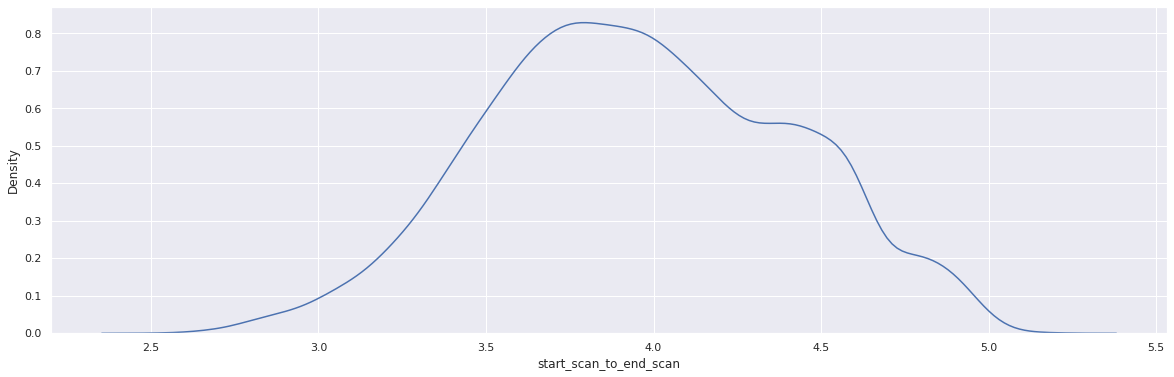

In [ ]:
sns.kdeplot(df2['start_scan_to_end_scan'])
plt.show()

In [ ]:
# start_scan_to_end_scan - before outlier treatment
outlier(df2, 'start_scan_to_end_scan')

 
OUTLIER FOR COLUMN : start_scan_to_end_scan
Outliers: 1
Lower limit 2.6284156047422353
Upper limit 5.297648585934834 


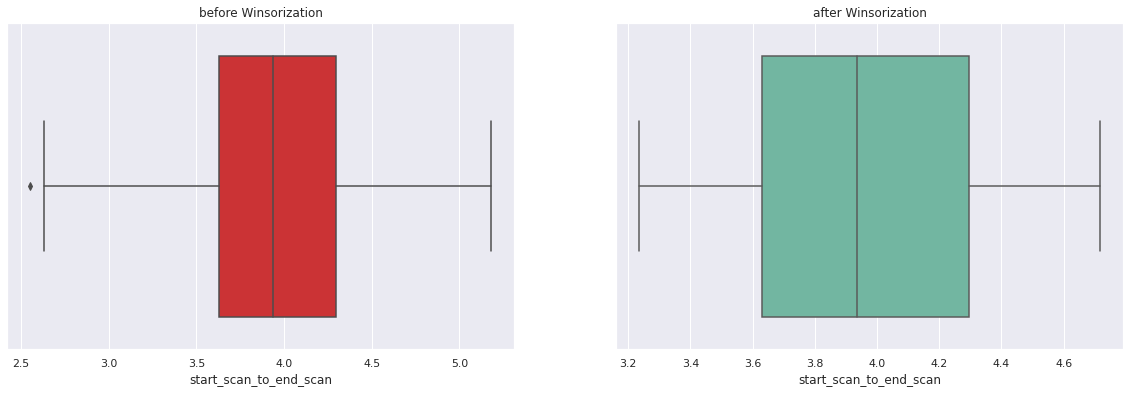

In [ ]:
# Initial data is right skewed, While verifying assumption for pearson coefficient we have applied box cox transform 
#on this column hence there is little outlier. So we are applying IQR technique to impute the outlier 
df2['start_scan_to_end_scan'] = outlierTreatment(df2, 'start_scan_to_end_scan', 0.05)

In [ ]:
# start_scan_to_end_scan - after outlier treatment
outlier(df2, 'start_scan_to_end_scan')

 
OUTLIER FOR COLUMN : start_scan_to_end_scan
Outliers: 0
Lower limit 2.6284156047422353
Upper limit 5.297648585934834 


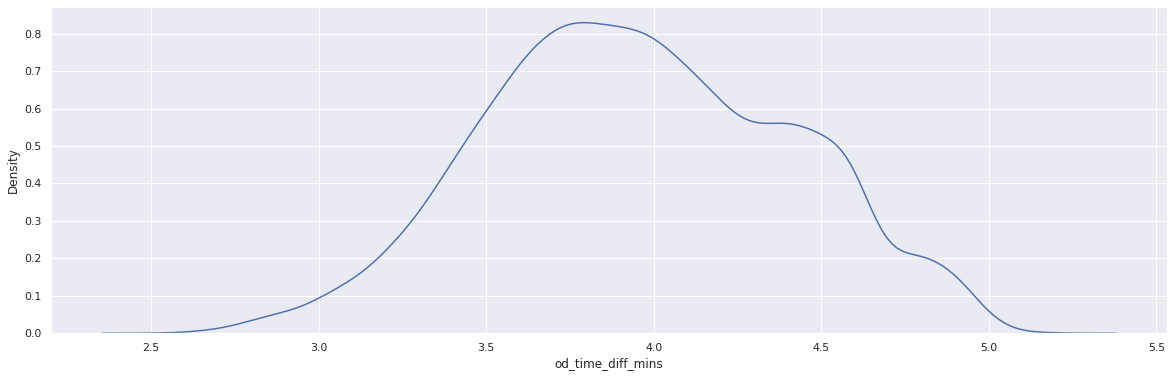

In [ ]:
sns.kdeplot(df2['od_time_diff_mins'])
plt.show()

In [ ]:
# od_time_diff_mins - before outlier treatment
outlier(df2, 'od_time_diff_mins')

 
OUTLIER FOR COLUMN : od_time_diff_mins
Outliers: 1
Lower limit 2.6283304293105187
Upper limit 5.297010527193204 


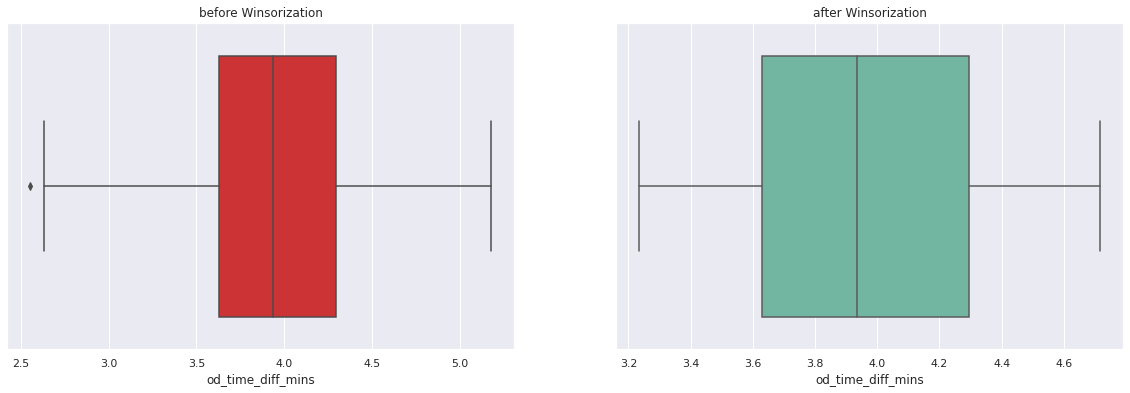

In [ ]:
# Initial data is right skewed, While verifying assumption for pearson coefficient we have applied box cox transform 
#on this column hence there is little outlier. So we are applying IQR technique to impute the outlier 
df2['od_time_diff_mins'] = outlierTreatment(df2, 'od_time_diff_mins', 0.05)

In [ ]:
# od_time_diff_mins - after outlier treatment
outlier(df2, 'od_time_diff_mins')

 
OUTLIER FOR COLUMN : od_time_diff_mins
Outliers: 0
Lower limit 2.6283304293105187
Upper limit 5.297010527193204 


In [ ]:
df2.head(5)

,trip_uuid,source_center,destination_center,route_type,trip_creation_time,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,...,source_place,destination_city,destination_place,source_code,source_state,destination_code,destination_state,trip_creation_year,trip_creation_month,trip_creation_day
0,trip-153671041653548748,IND209304AAA,IND000000ACB,FTL,2018-09-12 00:00:16,371.126665,4.370824,3.536017,3.486639,4.365970,...,Central,Gurgaon,Bilaspur,H_6,Uttar Pradesh,HB,Haryana,2018,9,12
1,trip-153671042288605164,IND561203AAB,IND562101AAA,Carting,2018-09-12 00:00:22,73.186911,3.463184,2.782760,2.799667,3.455502,...,ChikaDPP,Chikblapur,ShntiSgr,D,Karnataka,D,Karnataka,2018,9,12
2,trip-153671043369099517,IND000000ACB,IND160002AAC,FTL,2018-09-12 00:00:33,371.126665,4.370824,3.734885,3.650835,4.365970,...,Bilaspur,Chandigarh,Mehmdpur,HB,Haryana,H,Punjab,2018,9,12
3,trip-153671046011330457,IND400072AAB,IND401104AAA,Carting,2018-09-12 00:01:00,17.175274,3.023215,2.057355,2.165836,3.022370,...,Hub,Mumbai,MiraRd,,Maharashtra,IP,Maharashtra,2018,9,12
4,trip-153671052974046625,IND583101AAA,IND583201AAA,FTL,2018-09-12 00:02:09,127.448500,3.840199,2.991205,2.986767,3.837549,...,Dc,Hospet,,,Karnataka,Karnataka,Hospet,2018,9,12


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14817 non-null  object        
 1   source_center                   14817 non-null  object        
 2   destination_center              14817 non-null  object        
 3   route_type                      14817 non-null  object        
 4   trip_creation_time              14817 non-null  datetime64[ns]
 5   actual_distance_to_destination  14817 non-null  float64       
 6   actual_time                     14817 non-null  float64       
 7   osrm_time                       14817 non-null  float64       
 8   osrm_distance                   14817 non-null  float64       
 9   segment_actual_time             14817 non-null  float64       
 10  segment_osrm_time               14817 non-null  float64       
 11  se

In [ ]:
#one-hot encoding of categorical variables - route_type

df_route_ohe = pd.get_dummies(df2['route_type'] )
df2 = df2.join(df_route_ohe)
df2.head(5)

,trip_uuid,source_center,destination_center,route_type,trip_creation_time,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,...,destination_place,source_code,source_state,destination_code,destination_state,trip_creation_year,trip_creation_month,trip_creation_day,Carting,FTL
0,trip-153671041653548748,IND209304AAA,IND000000ACB,FTL,2018-09-12 00:00:16,371.126665,4.370824,3.536017,3.486639,4.365970,...,Bilaspur,H_6,Uttar Pradesh,HB,Haryana,2018,9,12,0,1
1,trip-153671042288605164,IND561203AAB,IND562101AAA,Carting,2018-09-12 00:00:22,73.186911,3.463184,2.782760,2.799667,3.455502,...,ShntiSgr,D,Karnataka,D,Karnataka,2018,9,12,1,0
2,trip-153671043369099517,IND000000ACB,IND160002AAC,FTL,2018-09-12 00:00:33,371.126665,4.370824,3.734885,3.650835,4.365970,...,Mehmdpur,HB,Haryana,H,Punjab,2018,9,12,0,1
3,trip-153671046011330457,IND400072AAB,IND401104AAA,Carting,2018-09-12 00:01:00,17.175274,3.023215,2.057355,2.165836,3.022370,...,MiraRd,,Maharashtra,IP,Maharashtra,2018,9,12,1,0
4,trip-153671052974046625,IND583101AAA,IND583201AAA,FTL,2018-09-12 00:02:09,127.448500,3.840199,2.991205,2.986767,3.837549,...,,,Karnataka,Karnataka,Hospet,2018,9,12,0,1


In [ ]:
#Numerical columns
df_num_col = df2[['actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',\
           'segment_osrm_time', 'segment_osrm_distance', 'start_scan_to_end_scan', 'od_time_diff_mins']]
df_num_col.head(5)

,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,start_scan_to_end_scan,od_time_diff_mins
0,371.126665,4.370824,3.536017,3.486639,4.365970,3.830249,3.677344,4.717211,4.716674
1,73.186911,3.463184,2.782760,2.799667,3.455502,2.872751,2.867879,3.723837,3.723527
2,371.126665,4.370824,3.734885,3.650835,4.365970,3.993716,3.809740,4.717211,4.716674
3,17.175274,3.023215,2.057355,2.165836,3.022370,2.150469,2.210848,3.421938,3.421682
4,127.448500,3.840199,2.991205,2.986767,3.837549,3.115461,3.071674,4.345439,4.344997


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
std_data = scaler.fit_transform(df_num_col)
std_data = pd.DataFrame(std_data, columns=df_num_col.columns)
std_data.head()

,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,start_scan_to_end_scan,od_time_diff_mins
0,2.266628,1.789607,1.705768,1.715191,1.789325,1.824261,1.816231,1.789647,1.789602
1,-0.307905,-0.063436,0.063701,0.161574,-0.067075,-0.051958,0.089086,-0.553254,-0.553300
2,2.266628,1.789607,2.139291,2.086529,1.789325,2.144574,2.098721,1.789647,1.789602
3,-0.791908,-0.961678,-1.517649,-1.271863,-0.950209,-1.467270,-1.312813,-1.265290,-1.265374
4,0.160976,0.706279,0.518103,0.584709,0.711901,0.423634,0.523920,0.912813,0.912791


<font color='33A2FF'><b>Actionable items for business:

<font color='#0dab7f'>1) Busiest corridor is Mumbai to Mumbai in Maharashtra state. Average distance between the busiest corridor Mumbai to Mumbai is 14.62 km. Average time between the busiest corridor Mumbai to Mumbai is 55.29 minutes. Hence company can increase their business by giving offers / discounts to busiest corridor under busiest state </font>


<font color='#0dab7f'>2) Most of the long distance trip are FTL and longest distance trip in FTL is around 2100 kms. Takes time around 6000+ mins and company can increase their business by giving offers / discounts to route type FTL</font>

<font color='#0dab7f'>3) To compare the linear relation between od_time_diff_mins and start_scan_to_end_scan. P Value is  0% which is less than alpha 5% so we reject Null hypothesis. Hence according to correlation test od_time_diff_mins is independent start_scan_to_end_scan</font>

<font color='#0dab7f'>4) To compare the linear relation between actual_time and osrm_time. P Value is  0% which is less than alpha 5% so we reject Null hypothesis. Hence according to correlation test actual_time is having linear relationship with osrm_time</font>

<font color='#0dab7f'>5) To compare the linear relation between actual_time and segment_actual_time. P Value is  0% which is less than alpha 5% so we reject Null hypothesis. Hence according to correlation test actual_time is having linear relationship with segment_actual_time</font>

<font color='#0dab7f'>6) To compare the linear relation between osrm_distance and segment_osrm_distance. P Value is  0% which is less than alpha 5% so we reject Null hypothesis. Hence according to correlation test osrm_distance is having linear relationship with segment_osrm_distance</font>

<font color='#0dab7f'>7)To compare the linear relation between osrm_time and segment_osrm_time. P Value is  0% which is less than alpha 5% so we reject Null hypothesis. Hence according to correlation test osrm_time is having linear relationship with segment_osrm_time</font>

